# Sampling

*Davide Gerosa (Milano-Bicocca)*


This course is based on previous work by many people. See [here]((https://github.com/dgerosa/machinelearning4physics_bicocca_2024) for credits.

---

# Action 2. Density estimation (i.e. going from the samples to the pdf)

As we will see at lenght, computing a probability is often impossibile. Most modern applications rely on producing samples from that pdf, wihout having its functional for.

Given some samples, we then want to reconstruct the pdf. Conceptually, this is the opposite of what we did last time: we're not going from the samples to the pdf. 

In [ ]:
Picturing (i.e. understanding!) a pdf is not a trivial task!
Let's see an example. This cell will start with a generating distribution ℎ(𝑥)
, draw a number of random samples as data {𝑥𝑖}
, and then fit these data with a parametric and non-parametric model 𝑓(𝑥)
.

1
# Based on Ivezic v2, Figure 6.8; edited by G. T. Richards, S. R. Taylor, and D. Gerosa
2
​
3
# Author: Jake VanderPlas
4
# License: BSD
5
#   The figure produced by this code is published in the textbook
6
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
7
#   For more information, see http://astroML.github.com
8
#   To report a bug or issue, use the following forum:
9
#    https://groups.google.com/forum/#!forum/astroml-general
10
​
11
import numpy as np
12
from matplotlib import pyplot as plt
13
from scipy import stats
14
​
15
from sklearn.neighbors import KernelDensity
16
​
17
from astropy.visualization import hist
18
from sklearn.mixture import GaussianMixture
19
​
20
#----------------------------------------------------------------------
21
# This function adjusts matplotlib settings for a uniform feel in the textbook.
22
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
23
# result in an error if LaTeX is not installed on your system.  In that case,
24
# you can set usetex to False.
25
if "setup_text_plots" not in globals():
26
    from astroML.plotting import setup_text_plots
27
setup_text_plots(fontsize=14, usetex=True)
28
%config InlineBackend.figure_format='retina' # very useful command for high-res images
1
#------------------------------------------------------------
2
# Generate our data: a mix of several Cauchy distributions
3
# In reality nature generates data for you
4
​
5
​
6
random_state = np.random.RandomState(seed=0)
7
N = 2000 # number of data points
8
mu_gamma_f = [(5, 1.0, 0.1),
9
              (7, 0.5, 0.5),
10
              (9, 0.1, 0.1),
11
              (12, 0.5, 0.2),
12
              (14, 1.0, 0.1)]
13
hx = lambda x: sum([f * stats.cauchy(mu, gamma).pdf(x)
14
                          for (mu, gamma, f) in mu_gamma_f])
15
x = np.concatenate([stats.cauchy(mu, gamma).rvs(int(f * N), random_state=random_state)
16
                    for (mu, gamma, f) in mu_gamma_f])
17
random_state.shuffle(x)
18
x = x[x > -10]
19
x = x[x < 30]
1
# These are the numbers you have. 
2
#Say these are stellar flux measurements, or a time series from a gravitational-wave detector
3
​
4
print(x.tolist())
[8.952596638950636, 6.942533358935216, 11.857502968790328, 7.9673676256550765, 8.339793768997136, 9.104030518710326, 9.034882898224481, 9.00066149734176, 12.068202801788292, 12.43803660691054, 9.171912910373514, 9.324573877535892, 12.793456190615046, 7.649754269389245, 6.957712694613811, 5.212342443874667, -0.5858969407576264, 10.819198381549345, 6.001707605068017, 12.208739158947212, 15.623442221914667, 9.12180574588649, 12.097206156705552, 11.752914357372388, 7.624716805403909, 9.127190737797093, 4.72461107622859, 7.039304136974619, 5.608240319346324, 6.5331353251927435, 6.595590247300794, 14.350048371783956, 6.734318572151493, 7.01540998481395, 9.000751889624222, 5.691289191711737, 12.940548902826198, 8.951356409071611, 4.261082360738824, 7.074183889581066, 7.773505002260368, 7.599377398071211, 7.578337462319974, 6.661074122722392, 7.032526365073723, 3.7013711421608306, 14.14247265328622, 15.2022714128919, 4.756113643850473, 5.3798787765960085, 6.710777342736699, 7.121288020008638, 8.257330210576704, 6.195497572930919, 5.715233380154599, 5.456753948921833, 11.88555940133287, 6.791364076569168, 6.509926248402068, 11.760838187694443, 6.8552501065177625, 6.622316425134957, 12.023212768304381, 2.843016636483957, 7.4857476810692685, 5.414823799019946, -4.7745826457682075, 3.4558770770472806, 19.86465608633137, 5.8170787079165684, 5.517876749817111, 6.710930604786078, 9.111443258939902, 11.051528248219634, 7.384755395161284, 14.071827743742325, 6.730439685065314, 6.424749092742336, 11.340348507639385, 10.573356551879645, 3.1986012076666865, 8.934935374617428, 10.627967422641001, 4.699852323971859, 7.04558440350256, 7.146941349179726, 9.138620160356282, 8.965984604411608, 16.39891077059228, 11.041855465782586, 7.5236873752497635, 8.787047886395047, 14.551140685392385, 14.188313829664176, 7.291933917035675, 16.659621722401777, 4.311743937331803, 6.4232977725355305, 6.062639486356698, 0.4667049706019615, 4.3590562137495255, 11.344897363083037, 11.725328718122444, 2.2386872204872788, 3.9643469418352266, 5.401310553414611, 5.3887336138407536, 6.47228696434461, 12.164594694656138, 11.675015756775332, 8.905724982987032, 6.817152050045018, 6.973890934024066, 5.278684474467626, 6.489064596014406, 6.18210514822002, 7.755372496406486, 13.02658656306706, 7.286986277798515, 6.955044708051351, 5.154565683423492, 2.5602438301257453, 6.6750360649543365, 8.927657835173553, 6.1946392196391855, 5.004160692540311, 7.570283193686513, 11.855642769998909, 12.243436195661076, 2.892451282555087, 11.872012767855253, 7.328291211564672, 6.914991381208461, 7.96773622168304, 12.268444955913933, 8.935665879721487, 10.606845771142499, 9.630505182021789, 6.479733265849988, 21.598636689427774, 7.73991336646213, -2.7385118384866303, 8.929740737861335, 8.74489625777586, 14.797546023359823, 9.645126466911425, 19.37409044263632, 13.937425352255628, 12.022761370019689, 3.9921349210376675, 7.054361149592758, 4.628745929328117, 7.43399799637156, 8.413251916741514, 11.302556902500484, 7.428657585286751, 12.33670472374477, 9.161440163296367, 4.6984488740260435, 11.240451001839093, 5.706133170472709, 7.274039049319992, -0.6960722777981836, 6.192635493293332, 7.652515890977432, -8.80949146054944, 5.642670376074408, 12.543084301386205, 14.242581638398592, 6.929551121082924, 11.312671668874515, 6.619142418849887, 11.81702568617612, 6.886248877480671, 12.303498062504834, 10.858692288819775, 11.76366781468676, 2.806975576872638, 5.688000184789247, 4.697785590703081, 7.373407201298596, 8.426638534456576, 6.759757754906344, 10.524327960957145, 7.299863873113752, 4.801372439785877, 7.194115989815686, 8.69299790702771, 7.831166521094056, 11.306748183889393, 6.782741529438399, 7.457538287258469, 6.563783750870273, 15.81631314729964, 7.022812373002843, 8.84861248926342, 3.214278542756615, 7.762217337525023, 12.563272421642678, 8.935821370580383, 6.576579227689916, 8.498820332009606, 8.912564764831021, 6.923738430188358, 11.798881735319545, 7.1242722744525455, 8.810691899436332, 13.765453689500946, 6.7797358195666355, 11.627352198829202, 11.896687553225409, 7.2812077610160975, 6.491760431925084, 9.02487018018738, 6.567007717171959, 6.69944701220885, 6.760401715827707, 5.625038674429424, 6.5513325857161995, 4.2809894637774955, 10.12432392954301, 6.605945117789278, 11.655296359974619, 6.854270078890569, 13.263669409697425, 12.414481393866435, 1.5629574109926363, 5.132980945817197, 5.112413712169197, 14.10116428535765, 0.47061177040904667, 10.113735036865233, 7.424172659869469, 11.863426930298294, 6.2297841537771745, 7.149070493218023, 6.583891994176227, 7.249240659625388, 12.289727803201734, 9.125779986450139, 5.066184833698473, 14.770073696211655, 6.6781285461216475, 8.466178105573382, 8.072358099350128, 9.54449582960549, 12.327312219831413, 11.560521538004016, 15.185299460442398, 6.130073153838291, 6.819187386579045, 6.4836814263901275, 6.4852296448004925, 5.2205620798379835, 14.406755378978216, 8.830690191173764, 5.553073732564928, 18.67293579877817, 6.0894553283133375, 6.742300717982237, 13.19975081211794, 7.202309558821065, 6.526563686294519, 6.807120703203435, 5.521887619676369, 7.142401201726869, 17.679967275574995, 14.002601841495972, 6.879400613211893, 12.687418299693018, 9.133586094130958, 6.9157710764187, 7.551512511980872, 9.005069746770923, 5.910019421962312, 7.186399687533907, 7.547976064402889, 7.261569373272285, 8.987327229754262, 8.827032991019525, 6.8931484005726915, 10.923758748486755, 6.705234156557187, 7.195834213604328, 5.74035187223277, 17.962119984413796, 7.682265110026949, -3.1901027710066465, 4.329296368179112, 12.069432945592458, 13.940737865769698, 12.679528961434691, 14.325560369243444, 11.295421108106474, 7.214473130614248, 7.341604740501355, 7.147079950705386, 6.536691172876925, 9.017819866056833, 6.637696669392393, 3.490009031505421, 11.161607160122378, 5.454800315669738, 7.354850573847521, -7.238611818375983, 9.21305032005309, 11.85264558591513, 7.253841826423093, 5.631413293506506, 11.28375559398925, 13.721795419667549, 7.679385042337366, 11.428922337560204, 7.031585730865202, 15.555162610313646, 7.048115447182072, 9.334496542365038, 6.801903260015946, 14.833631752484584, 6.241514956518143, 10.663784377731083, 13.93942338167269, 4.345047436305572, 6.442722911516139, 4.668687828211512, 6.460149364849716, 5.897690556201968, 9.882991366587206, 9.282038653955247, 5.297496314121417, 5.290220192834849, 9.144749980954689, 7.701512872653289, 10.534543606766416, 6.867404494878545, 7.529053588344962, 14.771831125938574, 15.215659719647313, 6.242126745150338, 9.023546422028563, 5.8382079993421785, 5.854997354394034, 8.376039185483062, 7.430700513896639, 22.856250348186904, 8.952034423554021, 5.596044135408944, 5.594106368175957, 19.666749509530057, 6.745223115493834, 18.082655623507254, 6.521270433647553, 1.929764532747532, 3.623586479550526, 9.06133450363542, 6.696336187830681, 7.223865956346059, 12.921914802564078, 5.2610232306799976, 12.530606505204569, 8.973498661158184, 7.581889254168751, 10.334809049560558, 13.390331876870677, 7.202029259443255, 8.95441063635549, 7.1301912976108355, 10.811364134807645, 6.560105286538448, 12.563727282252751, 10.870535153080002, 9.948811027857428, 5.881565899981249, 5.569082101951372, 3.0032746633786354, 6.593457209522251, 7.460314511318357, 6.400291458271676, 8.300638847399352, 10.791211205402458, 11.46071139506246, 21.58580956707549, 12.254083439302944, 9.50575900265915, 16.71941058944612, 11.684335874809339, 8.289815439737975, 4.471940997550306, 6.565948306610817, 8.96781325238323, 6.797308297693655, 5.223410741610092, 7.029864736603619, 6.5440278619784475, 12.215365272007432, 4.187474274050809, 6.927496602319317, 5.936410332737093, 21.036531079854477, 5.086840855096593, 6.568983337254973, 12.779308328242818, 9.368034821711474, 13.865327220010162, 7.028540597967665, 12.56909661091361, 12.538945693982358, 11.886272085340494, 7.217205209638954, 5.40690624342286, 6.713708410578731, 7.038370777880406, 12.13968802046945, 7.400711202156419, 14.252106786568765, 6.307201171512122, 8.828634271995838, 13.926398960855902, 14.263091586814125, 9.104765419938452, 12.368039001940572, 4.543597782059174, 3.8147600119338207, 12.83631629738993, 6.850025254968483, 6.997140437410639, 12.496002033536486, 11.654503095944953, 11.633720933033443, 9.147446332805401, 7.968821391576905, 11.255436686203538, 4.224710920792906, 7.3012006702114665, 12.395168386852768, 12.972474942929214, 18.048256912934647, 12.774113781167209, 6.025779020036551, 3.6242582096839677, 12.026465953851114, 19.667083745684668, 6.724367479017516, 6.925782633413907, 7.732579625728374, 7.044466681492083, 6.977408525801103, 6.43490909399154, 15.859206685730262, 6.473888502540994, 9.371680448363009, 12.088782537807345, 11.989642199327267, 3.1669760666373374, 4.426316871409124, 5.575815865812921, 5.797245143324225, 4.020470792499409, 6.728586108249058, 12.555315499657985, 7.038682467160993, 7.1042353889031515, 7.143118960018149, 12.367574615013897, 9.75469855170617, 14.03881546130942, 7.318078441670188, 5.617700978938521, 12.371314373433687, 8.223438720442887, 13.390887213091055, 4.545041980440899, 6.612783920633227, 7.017787314117653, 6.901777656854092, 8.891836384007778, 7.04062968313553, 7.799583089370683, 12.777453384996004, 13.856364114034884, 4.970016482916484, 6.63469357769432, 4.795742144146663, 6.467622033035609, 12.024261249520205, 12.041855453389472, 6.961954706672099, 14.352028718192768, 6.697262689115369, 8.805600013145105, 12.558117580393384, 9.170347771141802, 8.799711402294221, 6.611942445407593, 5.347273876119622, 6.240636285919412, 7.298639984718598, 6.717095270167948, 12.007127716355646, -1.3127269340662906, 12.86291649081185, 7.30789139471672, 11.453861201539125, 6.99650791820003, 10.085381645959664, 9.15247025060356, 6.608549779030909, 10.88491326478691, 8.053969446224258, 13.371629231240824, 9.025755307117912, 12.364793470376604, 11.930797599314424, 10.694963382624179, 12.240683273026221, 11.809759905192431, 13.486857685523235, 14.005570511998513, 8.966190951538175, 2.602061802961467, 8.991971246050229, 12.059889055446469, 6.790705644998358, 11.668383007756713, 12.278113309891145, 12.202045114826191, 9.237861511655037, 1.7105304679559734, 5.268732139711567, 8.290511703666796, 11.597343153543944, 5.5180562489612095, 4.853004813916627, 6.8844589649521755, -2.42442800603728, 6.412386677265597, 5.618314161455942, 11.831632506449356, 9.221436584817814, 12.838021924784467, 12.48936129871922, 5.422056230833434, 3.2428926405701723, 19.573557487127523, 12.059834490741705, 14.763145084015825, 10.15810468432059, 16.218683240777185, 6.840016378328617, 9.213712195838097, 13.836931797409171, 6.186210870214018, 11.021354597750785, 8.93136189147318, 13.837105960553247, 8.34827129811412, 1.7519549469705495, 13.8550024152062, 6.905049209328909, 11.75274806031944, 2.491841343818212, 16.010833454253156, 6.808303249465108, 13.961542287214574, 7.339267784640425, 14.185588271282992, 5.705409704534186, -1.1673386203278717, 7.01078198073965, 6.445121572081711, 12.045270157554713, 8.957205316835218, 9.105285486686693, 5.864860049171218, 1.5180718301422997, 12.152219740946506, 8.113186526562, 9.111008208544755, 8.97940677599639, 9.318646624704897, 10.641405566270286, 9.427733807632672, 13.681948185795836, 6.263515650174118, 7.9489051527066605, 13.37735377870316, 8.381303040027788, 3.9107157153392755, 7.503253627767003, 7.397405111706348, 9.769477679655122, 5.857289578166164, 13.533131657401126, 4.616525869945736, 4.529109119645225, 6.78860899033958, 9.10994709289683, 6.674925534574718, 7.550622059689117, 11.519172950100092, 6.065507674686403, 11.1344450994862, 6.084696637985561, 9.081696578656892, 6.832359244240998, 6.513581589783745, 4.087514757649441, 4.5293515442441805, 8.53665256574125, 5.691013110858726, 4.878389609319462, 14.518981296450976, 7.904033785421181, 11.940179948703003, 13.111374428872809, 13.168780815050841, 6.877611696297432, 9.116897144728282, 12.301296646881774, 14.059526934218418, 6.596838887504927, 13.459318699780285, 12.501977534499666, 8.920989295713353, 7.146261085916285, 7.0514966324582105, 11.481298388994004, 7.45007632330725, 8.904939740042296, 6.538677778208542, 6.033954230704908, 7.359084371483716, 8.744183585046926, 13.276760327815857, 5.136061786022745, 16.036042126661897, 6.909053329068919, 6.604688230360899, 2.931731536370743, 11.925074959252653, 6.779754749542265, 8.038111027862287, 26.580184409395812, 5.929361122815454, 8.127713350347374, 9.021139098347039, 9.012648246850626, 5.470261256634692, 7.503219950365975, 10.022854746078536, 11.832337986265063, 8.231341199765028, 11.599129137006564, 7.352875639414432, 10.277178789203152, 7.163141291895306, 8.928914116751729, 6.756244884786484, 8.991600508716036, 6.498174677495712, 5.8779882599643996, 14.16704774209308, 9.078513449214197, 7.777217651288676, 2.1622265863634196, 5.707963210303778, 6.442622370847952, 10.06395791112103, 9.007439769285275, 10.941243070612249, 7.230431313388802, 6.68889020304032, 11.281990805093557, 6.767976508988842, 7.354568025919849, 6.742214469146958, 5.7385358897777685, 2.2160415702907432, 8.273418879728016, 7.280022887420963, 6.512232189022265, 11.723267714205678, 6.931273624364855, -5.016688051176214, 13.519734057603848, 5.534832652910674, 7.761002598200099, 9.58406492297077, 12.961121043384695, 12.873952632033081, 9.446598714658572, 7.356113599419347, 5.218366403155666, 4.861364120257603, 9.034861922518559, 9.509050753442867, 7.8269137189960585, 13.033477610015453, 18.48209993085703, 9.622260937750227, 7.083124443971296, 12.270520260748283, 7.1245499636022345, 11.590195871455279, 13.002144853656416, 12.378471398430811, 3.31312271125062, 8.080675541215163, 8.253336215728794, 11.859978817150115, 12.569459743830738, 7.034606768925967, 4.221327719517365, 6.795445087611129, 6.682728140425669, 17.789612315819273, 6.734696471649238, 7.017634449050614, 8.218207312649053, 9.052145373651067, 11.515660538532671, 9.199965075005291, 8.649094282709356, 5.685063892946819, 5.217085115419252, 11.970186288794423, 6.87844608155637, 8.982378480725332, 8.707131832724242, 4.1184259241729775, 6.8306693285015365, 8.426761140042494, 7.597376208796177, 6.888428033662958, 11.589250099811673, 7.106014707754712, 12.106282668783166, 6.400974057148373, 13.679895251816994, 7.16132103819394, 4.356456889177689, 13.867349024068346, 13.085115044613213, 12.701895398763881, 9.040007793020688, 6.2128921956185135, 5.802128288562811, 5.808019776307056, 6.44499860001863, 8.200699405169836, 4.608485871282941, 7.009215937607531, 9.273081286128198, 6.3817201981783205, 12.436566964259917, 5.296693992813538, 6.932399316883946, 13.587951048023257, 5.945689437778257, 6.540194666761707, 7.385418742244355, 14.487165643993585, 11.78101273406919, 18.4971173352674, 7.234557772987957, 12.495639705586918, 8.518044524361525, 11.789303832822016, 12.189430627337618, 7.300057549539817, 7.2102542323852585, 8.63801431399606, 7.193718959822746, 9.357943809850504, 4.254765108021592, 11.684400103629848, 13.345212655087025, 8.1277873900025, 12.074157043336307, 3.0289515646314196, 6.7048667088906315, 4.231626925877524, 15.879053793087191, 5.243225904740787, 9.115796527521717, 4.7914926918738825, 6.93213587196803, 6.8778093311331485, 6.165157836670872, 7.123600841526242, 6.846241148715686, 24.713715599165923, 6.869336927082973, 5.855463192146424, 13.35049315651792, 9.925354436804371, 5.705350210270545, 6.933862901182924, 23.624917435942134, 9.015277377999658, 7.156287618193785, 6.541484047727091, 11.750442797624789, 8.69583661210152, 7.024584440396409, 11.317537115235062, 10.860086097062775, 7.034711171727231, 7.617699749697625, 11.970991595835043, 12.010261383350786, 6.590921122824629, 7.1447435701185205, 10.861168609603896, 5.37416066280319, 6.95655886823449, 11.56845379821869, 6.846822044523139, 14.69683674440191, 15.63966590723804, 7.23471659792663, 6.978640604353704, 6.518847368822383, 7.169641536409823, 7.027214983467195, 12.820189325514798, 9.054963417006883, 7.108827199044275, 12.711122036352487, 8.124176596779817, 4.491931249931911, 12.352219559057593, 11.923714859073936, 6.741649429798641, 6.791596793842355, 6.801843189852431, 12.478857873510467, 6.652824979543995, 8.925355150591338, 7.003753421549918, 11.686418337861706, 9.11282292329995, 11.424681533552349, 11.867146837199018, 6.926749778704458, 6.755770556919571, 10.46123789730672, 6.778905970761193, 7.175145391588584, 12.677063221709082, 9.076557661666982, 7.031382228367575, 11.66634185232462, 9.845930956152728, 9.015467127006223, 6.842779172887291, 15.29996579470425, 7.057073435394074, 7.60123370311408, 4.972335107365055, 6.824092951263499, -6.216694565399148, 12.478172686875059, 15.749405042718623, 6.1656702206183605, 7.318444432519128, 11.62257347242733, 4.723940721683535, 6.64665116634309, 13.722267124534234, 11.702078272955426, 5.387360290907736, 6.7490565313901305, 14.8879516338768, 6.839724641296915, 7.230660678788575, 8.946995026391763, 5.293502523947072, 5.838122045188661, 7.277167668684151, 9.066310209470773, 7.321156865173441, 12.104930190209064, 7.995244508215837, 6.106250418597424, 12.44682551581623, 5.572059080629122, -5.56202762587651, 9.113519815226976, 19.900002058145585, 13.157248544072635, 7.380028797755003, 12.644050733200848, 6.324369857128911, 6.24981541931477, 7.687263756311621, 6.61970371770298, 7.015739630768975, 13.214571323368107, 12.30211730331629, 6.906855117959339, 6.785219267058373, 14.176673828860135, 7.187973969499209, 7.768333683602753, 9.697811975879553, 9.094095134507459, -1.7853830693414405, 12.289824090375417, 8.967663746934587, 5.950369196343733, 12.201392438557374, 12.829395511841074, 13.320260730624312, 10.902030622180469, 9.038686095446133, 6.60811518566551, 4.049113775968209, 5.953003380872367, 8.916203558100927, 8.628931482673043, 7.246059161713899, 4.804682597875511, 6.972616060459636, 6.934445130205634, 11.682324218245911, 6.9319001528686295, 7.232910753767254, 8.914208545360998, 11.91563595490352, 9.86962487288464, 7.078388241238575, 6.9306664257592345, 8.485791371905044, 6.729894875243904, 6.547628691776598, 6.5792777248639345, 1.8241980958738977, 11.97232638016217, 6.577421635807515, 7.055054559323183, 5.577890810393315, 14.170536047852162, 6.936605307559104, 5.83312585395623, 3.756814060252555, 6.888900306707745, 4.735835129228014, 7.461479855527017, 9.142725917364395, 7.324587684932813, 11.427661135000008, 4.092304272526709, 5.9781362448509, 11.89030947981665, 11.891271911452067, 13.206486998745373, 6.787199778134537, 5.99497712230725, 6.000800283672351, 7.579705394612438, 7.49581916603063, 13.262470496886607, 8.941396954544228, 1.9343490723175556, 8.592281336709277, 7.567020829309463, 7.4544305561087265, 7.069043208687131, 6.82453386667141, 6.506060911344622, 8.06734745574119, 6.78926745624797, -6.921429719603756, 6.37793383712003, 12.299293305347376, 13.31476326222848, 7.009916518221682, 6.993669816596188, 7.461550654435051, 11.953245214596524, 11.468533000258535, 8.043116800998735, 6.354357241930323, 16.594148323715004, 7.108216006743236, 5.577769428613104, 6.636798137095287, 12.113091917891804, 9.098765341463668, 11.278113179739298, 7.189038414853416, 12.058653543559162, 6.748971487183515, 6.907929836272299, 7.2238357017207635, 13.876232904293722, 7.41737143844891, 7.496207617317603, 14.356809867707637, 12.213231865286534, 12.697680631778535, 10.964049166452504, 11.963495011581486, 6.797939490495679, 11.602841951312278, 11.717729641812044, 9.11699545143856, 12.88074201096045, 11.745773653507296, 7.173487189424881, 12.397279254569442, 7.4126319711377935, 8.182348262428315, 6.209953504879023, 10.411378672841494, 5.367477218436564, 12.474292571815733, 14.383690224378086, 6.990507847731796, 14.832808312899099, 7.198872905489446, 2.5181753474792394, 12.184519890929243, 11.569504926966701, 10.86715272749808, 6.093660025647556, 8.824608353321814, 6.978422864275179, 6.49499074471595, 12.001893048029489, 8.684871297895347, 11.983791424097504, 9.71008624444426, 5.247496206228101, 10.281842800324199, 10.683812432615758, 4.799558595342611, 9.022117551936232, 6.54514898177422, 11.685926358866636, 9.996461521371806, 7.315973289107587, 15.620290049439364, 21.124004059152085, 11.38497420550927, 12.256573827953643, 11.864823698911987, 4.303330082619867, 6.824722421262647, 7.837369716311107, 10.971685833700574, 7.4009451156749275, 2.4337294553559996, 9.27049423836491, 11.523987959647208, 3.314687690297559, 6.56267406452271, 8.647932815407161, 8.124865286612614, 12.641348497475077, 9.271589440888457, 10.604307920283162, 11.683677532791652, 7.485243789500293, 7.92859437630489, 7.388687883721539, 8.739226537542233, 12.32949003845467, 11.797056519174069, 6.086527069210012, 14.117212470647363, 6.796090463801637, 7.032658313809538, 6.172161518423144, 7.168250507498014, 10.760925731637698, 7.200996466560285, 7.172438656032628, 6.790147694876215, 6.5012494601243525, 6.974087172678899, 4.527546040033383, 7.826740343533628, -7.010182704650838, 11.325512107586112, 10.489788640590827, 12.212196511031202, 13.211964345183535, 7.2337239796308355, 13.686318876345055, 9.073541407818007, 12.092588434704407, 7.521762471962475, 12.14684333559434, 11.959360458801774, 4.562498096303781, 12.053576042241504, 12.844069011439496, 7.808595819222602, 7.428600819866301, 4.351030642662996, 7.227768177504313, 14.377016987307654, 4.027004674557006, 13.480380687145672, 9.715878961206354, 9.866294434669197, 7.188086912839178, 9.002421887912176, 7.082726448340874, 6.459926771076171, 8.968093377616643, 6.306835932386838, 13.58689007813258, 9.891822992688994, 12.29894742085236, 9.067356977788403, 12.138943475061051, 5.5137367296192075, 14.732592691194398, 6.647293315957205, 6.968638686160879, 11.054520461845152, 4.927651408024241, 6.976366513811854, 4.781147685886891, 9.00872890664483, 10.641067376297237, 7.354896128842619, 6.732020440139875, 12.696512329329634, 8.285174814502057, 6.243480366744739, 14.353546808721497, 14.00788366640825, 13.337238358884507, 13.242361451083125, 6.647345168267419, 7.273195156488706, 9.684157532747658, 7.258980857130888, 14.487548642186377, 7.638549772083952, 6.983435607351181, 13.860234890270604, 10.564424734466634, 6.626917253717501, 12.710850873035834, 9.13836688488696, 13.281251379256092, 11.615642629779574, 15.639713663992078, 9.013704475397413, 6.431305291338903, 9.264211357645031, 8.97223077710616, 6.662125722467158, 11.30040697503627, 11.416266098230729, 7.9740191395239, 1.9882857053185754, 6.333729905510479, 9.733512010418812, 6.918179674881472, 6.987999021921, 11.280126083843584, 5.529471318576677, 7.142119930038759, 6.036384054852389, 8.868626761173083, 10.599619237892748, 8.986796052655203, 5.066053150624623, 7.410014560137317, 8.936681766156932, 11.632501749893303, 7.0550683218900945, 7.234270888225602, 10.154351658412736, 8.958233210722028, 9.058666403410504, 12.726115815159176, 7.057712764297468, 6.4120252978711, 2.2326307379198354, 8.801243076532407, 11.825510005278124, 7.009964753344983, 6.6405514833472195, 8.146597681220559, 10.973175577566229, 6.711689452456975, 5.5243700649905465, 7.836570099640364, 16.17214742886357, 6.835845805567223, 9.808166774309989, 7.844832018632519, 15.070219874733281, 10.541035943760608, 7.469188233227817, 5.500469526719125, 9.148303575508194, 5.237837922624864, 6.703560733694715, 12.470558613600195, 11.161338369976932, 7.689354362225619, 7.501872822748249, 11.133191218272922, 6.462206855995488, 5.424945607290498, 4.376413989538427, 8.946766466462748, 7.065369471489825, 7.38898768158803, 5.091026232736668, 6.148607450832074, 6.678784230494616, 6.961580126782222, 7.042367084403693, 7.31110564379529, 7.717483870564192, 14.749072338210395, 3.8469774737654943, 9.131700745056463, 16.312852716301762, 6.879437954970956, 11.074267275103294, 5.859178189974335, 7.566503817421687, 5.46597976016828, 6.798840413466559, 13.610069531895773, 8.91109871033089, 15.783346083510011, 13.824258995030897, 9.01754802025843, 17.10169709958295, 6.6616432737070355, 21.312799200339278, 4.154887421866297, 6.368758371050905, 12.155859037625934, 8.679101148155201, 23.479146190420295, 9.703376071941433, 6.50989643342899, 6.91206784536929, 5.911044826267413, 9.072908294621408, 14.765368888209407, 7.767207285456871, 14.650606016397893, 11.401332495498009, 7.334062682416027, 6.723119515261951, 4.558136964649036, 12.312690697332009, 12.049633164761563, 5.745375535939105, 12.733000103801446, 12.280749490209185, 9.015468072388776, 7.034890239217885, 5.682852544958761, 12.387986466603174, 6.371196776498573, 6.38648727512692, 6.818451989444522, 12.044594985188674, 6.18276079400339, 7.443204134133721, 8.487180181805774, 5.073166055484063, 6.765763739573812, 12.175667544205515, 6.86297379337068, 14.81772062216328, 11.951461395743667, 5.643737077547662, 9.22545688549001, 2.478837995839617, 7.027326195751129, 6.712646040216521, 11.807586672417795, 11.202194844454125, 8.507554113437367, 6.572480136643623, 11.111653776600438, 7.217922360267955, 0.8116467583885676, 7.284499184007878, 6.427976473287208, 9.05486839562113, 12.74063095236815, 6.837213846032312, 6.829220960090987, 7.787996691479909, 12.383382687072567, 14.039002154217949, 17.091230755072104, 5.687201245013761, 7.023456926158063, 7.029620761741989, 7.203975382911695, 12.144772673635973, 9.56286722105299, 6.6193770159248215, 6.774430187350096, -0.8009488189972798, 7.135900337409589, 11.58117897679062, 11.305257691037323, 6.745034792678626, 14.520418234195828, 8.96140831757084, 5.940178332771578, 13.197712016992545, 4.6628999007021115, 13.50795678535747, 11.985806220729584, 6.614271569232118, 9.741813632389615, 11.170662907738423, 11.75129178072313, 11.121299742569562, 11.392810270675604, 11.81365426202741, 6.893301545409807, 13.378712009605929, 4.893765206781346, 6.86845110683235, 12.37151241474978, 7.569228911553216, 10.717757959121343, 12.90960964715831, 7.527040326782769, 2.7244851381595274, 12.142987334304102, 7.379293030823061, 6.344715294606626, 14.060237942578414, 14.030833802524118, 7.212157658382289, 9.159677910324579, 19.40266628619724, 7.20324169939552, 11.681527514204056, 6.919666787989292, 7.094035716751656, 9.112139144660262, 4.515211867393564, 11.951760210991416, 14.932290991400532, 7.3520398818267365, 6.980632336413033, 16.410835927210968, 7.083354120544382, 8.081825067901997, 6.628398092163631, 10.83582539117231, 11.845790593888747, 6.442209554090313, 12.191060817099471, 11.989911811725406, 8.191794708775989, 14.420554851354701, 7.028620812963018, 6.834816664096059, 12.687579511370483, 7.0867587295109065, 9.03770425908276, 12.596870290270965, 11.775259884666973, 5.724046052793435, 12.566677397392208, 9.00077067128107, 8.79155936488387, 7.412022103888882, 4.959386731546293, 29.020105995534475, 7.745453178837573, 7.132269573724061, 12.707480044991057, 3.56478272196545, 6.844101645708884, 9.551860305193784, 6.7535408422727246, -0.42444058873540946, 6.837195694937949, 8.941869822882767, 26.918184236790392, 6.603832787706708, 12.946956379437092, 12.14213047293747, 7.0692479497292116, 7.268290397592829, 8.194690564935284, 19.686940644739416, 5.141946670285295, 6.851841266238974, 8.470795909583071, 7.571559570133704, 5.868903512405287, 6.303720320931217, 0.5936748268627943, 12.18776171908774, 12.501688795299382, 14.749506443718607, 4.755447020702094, 1.701727391976827, 6.847798730873417, -6.208769716815777, 13.574637539100356, 8.789735202781031, 4.230175095064601, 7.511930632150213, 6.0043613129781, 14.224353341552678, 8.128957373022098, 13.34192034950452, 8.283071385733013, 11.280600586112703, 5.499958782900659, 5.747948387710847, 3.403876220394118, 12.420003186617953, 11.272776668527774, 6.965971767275564, 5.400699113871966, -2.678464182742548, 12.354274698008341, 21.443055052149976, 6.348047767529818, 9.093689221595778, 6.780985936519547, 8.601421038000415, 6.773379659801707, 6.961162432205193, 13.724535278512022, 7.515639311418011, 8.093340601227725, 6.9812300398015195, 5.068746521650989, 7.011996190570655, 5.685578037504599, 6.9145728840989715, 6.586669624803633, 5.882300162330736, 7.851845149867738, 28.51941380136931, 9.90827318268368, 7.405394264394284, 6.967571972890866, 9.13194646818569, 8.526774520321457, 10.60528360277599, 7.13373807802238, 6.768904347271968, 9.413796587498517, 6.492673873664055, 8.05893231585965, 1.4383958494829692, 14.385193047238895, 11.297298746807416, 1.8252779386004168, 12.164680731218368, 7.445702224403253, 9.640554205865353, 8.687597579328147, 12.087577829074693, 6.4342620612706085, 7.2143180310620005, 7.64812124996179, 9.06969472881813, 11.791813947712294, 7.375283058870414, 11.676620103168277, 7.004273865696763, 11.614821802596415, 7.432624533778354, 7.929139919708311, 22.675367873928938, 7.082542174652956, 10.873926406543228, 7.091103253761864, 6.878351688696381, 13.399337338921836, 19.502804922640724, 7.440328335870561, 7.142947989831098, 11.93851062639482, 9.350397240978578, 5.224175631602608, 8.009413979324806, 3.5920737406412595, 6.553071821522593, 6.964829373609375, 7.309091438016207, 8.750758067834186, 13.516723183062592, 6.2400321000513, 7.150182692497454, 6.802644781466888, 7.348962534767795, 16.418502112979688, 6.361451501165564, 10.694762638041254, 11.660649081727117, 18.996406764531898, 6.800320327241336, 6.953719932766829, 13.52600263246471, 10.992097274671359, 8.585062689395405, 18.329943031404866, 6.883119897986309, 6.866067644182304, 13.34001485887729, 7.763913844525529, 14.879451120371126, 12.71679576941862, 5.4859672907588894, 5.550464820316129, 2.2053300239375595, 15.927700953290536, 6.880627818483194, 3.7095002177272836, 11.838355474408209, 6.664308484995112, 6.528758941487081, 6.897325427051207, 6.833917808895734, 5.695088115065443, 13.970300252121238, 13.777070011087718, 9.008771109947896, 9.049201706004444, 6.555573746982933, 13.55002218306496, 13.720122437932048, 10.654243497002032, 6.744128842606789, 6.228476356530689, 6.383358240270921, 8.945882142548845, 9.018421515966855, 6.4748041537028955, 8.916271218666683, 6.670601064154221, 7.362364989483268, 8.941112738976608, 3.9279532730636753, 26.621080712156292, 8.136313465466051, 8.381281722720757, 4.901195191974905, 4.495089607069853, 7.973305897487838, 9.05740238481852, 3.328681037390001, 6.204301945315569, 11.738488587191947, 13.06523952731087, 10.55872632856024, 4.668890286599242, 14.323466223883965, 9.59282677627662, 12.031433662644167, 13.452716414827501, 6.876723606259362, 8.608081706393484, 11.662332532415515, 13.281593384004495, 7.269418216516551, 12.47025598628555, 16.453817054453275, 2.444492700257686, 8.865603742547062, 14.574358089041656, 8.323486367534782, -6.070028748153771, -9.890167554081579, 7.617056489761675, 6.872524683425343, 2.7940112149664413, 6.832762641171434, 21.507154964395774, 5.230966417354352, 11.043140254661175, 5.522257399696264, 7.4143398563390335, 9.021592805577207, 7.147014278616847, 6.759607370010269, 7.092211259896514, 5.4933828299674925, 12.268860601446303, 13.544907751890957, 12.26364281143595, 9.069853709155282, 15.394331461035968, 3.9208808322448014, 9.22359726535049, 7.325582422888461, 5.179297144607573, 7.339857105465976, 5.824570452601675, 14.962617627403604, 6.836188644776897, 9.00379709213352, 6.400072256337544, 12.38545718143132, 6.383464096069581, 11.5489545803673, 7.362252411772547, 3.800787541968503, 6.09413901524497, 5.934718239958054, 4.764520427347624, 14.715695082662776, 12.683452892222428, 5.94076426708134, 11.973994042296132, 10.561703031292737, 4.790997904108675, 9.880981746696893, 6.931097042196352, 7.751128915148049, 7.234252226516989, 6.932618858371901, 6.588633028841694, 9.039014363998827, 8.607005440320151, 3.714002167778573, 6.438936379322467, 7.38917088500872, 7.938872112269865, 7.349433293564839, 6.906769505168733, 8.977646289727003, 6.823170971667894, 6.68498373712945, 8.031069798938729, 7.320386498278415, 8.254039307746705, 6.84487839228687, 5.3418344124006465, 6.632360345045692, 2.517852797982397, 6.211004958787935, 6.9346061730929645, 14.821356788031794, 11.649036755287021, 5.461389496403894, 5.41456217306307, 12.232148715757424, 6.857484378331105, 7.583569651443824, 7.365328814609054, 9.497959572591814, 6.984766963584178, 7.185114518982949, 7.3710505326263664, 13.297020113021828, 7.058260051534283, 7.13980179008891, 11.97980134803834, 8.24423138156356, 12.638231132029437, 11.354820127644393, 12.46409682406573, 11.529285647438016, 8.265368085888205, 8.975943581617495, 11.563502407571372, 5.384827940780271, 11.882605478539226, 5.0404189042036025, 8.499358529542617, 12.571023172915371, 9.056705171737107, 23.46881308290806, 8.829599789301575, 11.33032053913967, 6.545905209398164, 12.655152309110154, 6.891993604631731, 14.358909876827859, 7.02724265839944, 14.823102645734238, 8.082959695483718, 13.652841404279856, 7.442792786952829, 14.148576998455733, 13.51371325096842, 6.73627972720658, 7.08668955769352, 6.298242977417739, 7.195207775346878, 11.175477090317855, 9.074196232591595, 7.141183554279301, 12.080793508862769, 10.30051870037897, 14.156512584566382, 7.870113285602201, 7.610148689600642, 7.09611383866419, 6.881624668193296, 7.343273894653581, 6.440822576121029, 12.57292868938497, 8.65399202430721, 11.295962966406565, 14.485477429913521, 2.66758226863469, 8.381867153509509, 0.5371123083683118, 11.862297486747686, 7.672035978699446, 0.10520164805877474, 16.426960447949437, 9.382391630022894, 6.453391925264657, 9.019830254515814, 6.9351906687275315, 9.805042740296248, 6.396005193409462, 12.848348744278123, 7.754334614268818, 5.707888278974348, 12.889470793202397, 11.67744751995941, 6.4874766046240655, 8.521922057642746, 9.046523828181666, 6.715841223834883, 6.8531239389147895, 6.218387396430712, 5.080230084675351, 6.785143409083088, 14.838041831914362, 6.675439112401661, -3.081600853820415, 6.758368500050699, 12.287196817726036, 12.944892821782929, 7.65201447173237, 7.578434783536712, 15.240666642513006, 5.878197175842592, 7.436801673260582, 6.104682030078665, 12.347162432949535, 9.21372042437729, 12.929968769666877, 7.434947866471283, 8.116205296935716, 6.789602363569304, 6.579963634645263, 9.062369306820708, 6.931567663476179, 6.849155379436006, 6.1149259013874735, 7.834328068922182, 9.027731382144815, 1.7889182912125707, 12.574122020698072, 8.82775743862172, 11.437348770276529, 5.270943070022271, 14.20644516988937, 8.602315736188753, 11.220931634098434, 4.832344611939629, 10.440511202777989, 11.516271340668943, 12.407219431968901, 3.8211092802090203, 7.712683071767981, 16.157088909883374, 6.377495520111803, 8.150356946548147, 12.990507148619427, 10.219199935627042, 9.031908060389586, 4.772408468814463, 13.948119317178739, 10.491128804986687, 13.62495424149853, -2.3199286774961276, 8.270758674174576, 7.2000916691447765, 13.926527683652703, 9.189088419023468, 12.978946232690268, 14.980301535913041, 3.041372537953364, 6.646710361291593, 10.358636843271864, 11.90928914610556, 8.006549769990198, 7.162829601635287, 7.801200353969058, 8.173449718089426, 7.469819620131897, 7.094863169742908, 14.717539870625144, -0.22208434145476197, 8.233313649869823, 14.112640534037315, 6.580050996624619, 13.318475001594338, 4.597157993705627, 12.640588675987875, 6.0438482768318424, 10.000365441772487, 0.5638530356002223, 8.55817634765807, 8.096845925242254, 11.997541347565734, 6.472746383145977, 8.83007288996728, 6.83608211996286, 6.593815078163559, 6.581913663138388, 7.35690262343712, 8.699686908922214, 12.422411113345163, 7.038061181145389, 4.625967987483422, 10.065816209647924, 7.530046403460814, 4.265180230872969, 9.122109631017844, 0.45576274812529594, 7.424784161706958, 22.022933884706553, 17.978010345827407, 5.585674413995635, 8.87901306020531, 12.829162311557809, 6.617535184002678, 11.866475297634475, 14.892454166973714, 11.257931887152866, 7.434625431049974, 9.042218883388555, 6.546848009680842, 7.240647974686908, 7.597775098177896, 6.762787307539995, 19.57175643884119, 7.295522266417779, 13.395561167897943, 9.259884632083311, 8.697964618636183, 11.293305290283964, 6.369070047507685, 6.99590227476925, 7.232200674516776, 6.320587614392989, 6.406556556020475, 17.405760381709342, 5.33454501068848, 6.721344684286741, 23.97780877805616, 20.135196310298753, 9.03963855386948, 7.684577929603367, 7.223845635693454, 7.5944712711328455, 7.510284175123881, 8.923521894628278, 11.890562258803147, 6.092061155041585, 13.67954218165216, 10.346576294140283, 5.71427257156779, 14.38001414986764, 9.215297467022703, 8.807291291441144, 6.511314347536672, 6.984947082038528, 3.4586304003899997, 8.052046988183365, 5.465289264559419, 7.668516212985683, 15.145575513803074, 6.675018971911318, 6.774074601760693, 6.840510761079168, 14.346811677298343, 6.687808399407786, 6.719939872411122, -4.964142001723934, 7.139168286946017, 7.792086895953264, 11.934796169128001, 6.470324533668289, 10.876262192445099, 11.687022275381139, 7.225354708908462, 5.243927572735473, 6.110167931806957, 7.311045917672502, 9.263042529410649, 9.845114614732449, 11.925008162998129, 9.010188769480273, 8.624337439590557, 5.5804697418420615, 4.725289094277516, 10.869540810496982, 11.40260711270168, 11.990488082609362, 6.2670835961276055, 8.67635445972101, 6.716836576060793, 6.309969664381697, 12.373942687520511, 11.649220332757599, 7.826410029252393, 6.700018949647153, 6.987261592390378, 8.385983733254742, 6.739739025814246, 6.97445687342104, 7.378887017993616, 16.848677113838903, 11.126887545988563, 9.055195022930397, 7.502408676891286, 7.001670034193867, 13.980725472431489, 7.3771576327009845, 12.236366286440324, 8.896528422538816, 6.791497435511148, 12.886578733223205, 6.365483944264434, 6.953764363274848, 12.913850336111903, 8.199510473043242, 15.540490220354933, 6.891136147289275, 12.098747857312238, 21.181856549885353, 6.001765113888735, 11.212581496526711, 7.434007310654368, 11.742590564225052, 8.286908276305988, 5.534029532646235, 13.274517005013454, 20.13754698517355, 8.924556745465944, 8.048308288967826, 6.299199349400904, 12.56638145682066, 9.153726655359803]
1
#Let's do the easiest thing ever.
2
plt.hist(x,bins=1000);

1
#------------------------------------------------------------
2
# plot the results
3
fig,ax = plt.subplots(figsize=(10, 10))
4
xgrid = np.linspace(-10, 30, 1000)
5
​
6
# True distribution: you typically don't have it! Only have the samples!
7
if False:
8
    ax.plot(xgrid, hx(xgrid), ':', color='black', zorder=3,
9
            label="$h(x)$, Generating Distribution")
10
​
11
# A simple histogram
12
# But try changing the number of bins!
13
if True:
14
    ax.hist(x,density=True,color='C0',bins=100,histtype='step',lw=2, label='Histogram, 100 bins')
15
​
16
# Something more sophisticated: Kernel Density Estimation
17
# But try changing the bandwith! 
18
if True:
19
    kde = KernelDensity(bandwidth=0.1, kernel='gaussian')
20
    kde.fit(x[:, None])
21
    dens_kde = np.exp(kde.score_samples(xgrid[:, None]))
22
    ax.plot(xgrid, dens_kde, '-', color='C1', zorder=3,
23
            label="$f(x)$, non-parametric (KDE)")
24
​
25
# Use Gaussian Mixtures with a pre-defined number of clusters (13)
26
if True:
27
    gmm = GaussianMixture(n_components=13).fit(x.reshape(-1, 1))
28
    logprob = gmm.score_samples(xgrid.reshape(-1, 1))
29
    fx = lambda j : np.exp(gmm.score_samples(j.reshape(-1, 1)))
30
    ax.plot(xgrid, fx(np.array(xgrid)), '-', color='C2',
31
            label="$f(x)$, parametric (13 Gaussians)")
32
​
33
# Plot cosmetics
34
ax.text(0.02, 0.95, "%i points" % N, ha='left', va='top',
35
            transform=ax.transAxes)
36
​
37
ax.set_ylabel('$p(x)$',fontsize=14)
38
ax.legend(loc='upper right')
39
​
40
ax.set_xlabel('$x$',fontsize=14)
41
ax.set_xlim(0, 20)
42
ax.set_ylim(-0.01, 0.4001)
43
​
44
plt.show()



### Picturing (i.e. understanding!) a pdf is not a trivial task!

Let's start with an example.

In [1]:
# Based on Ivezic v2, Figure 6.8; edited by G. T. Richards, S. R. Taylor, and D. Gerosa

# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general

import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

from sklearn.neighbors import KernelDensity

from astropy.visualization import hist
from sklearn.mixture import GaussianMixture

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=14, usetex=True)
%config InlineBackend.figure_format='retina' # very useful command for high-res images

/Users/dgerosa/box/lib/python3.11/site-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


In [2]:
#------------------------------------------------------------
# Generate our data: a mix of several Cauchy distributions
# In reality nature generates data for you


random_state = np.random.RandomState(seed=0)
N = 2000 # number of data points
mu_gamma_f = [(5, 1.0, 0.1),
              (7, 0.5, 0.5),
              (9, 0.1, 0.1),
              (12, 0.5, 0.2),
              (14, 1.0, 0.1)]
hx = lambda x: sum([f * stats.cauchy(mu, gamma).pdf(x)
                          for (mu, gamma, f) in mu_gamma_f])
x = np.concatenate([stats.cauchy(mu, gamma).rvs(int(f * N), random_state=random_state)
                    for (mu, gamma, f) in mu_gamma_f])
random_state.shuffle(x)
x = x[x > -10]
x = x[x < 30]

These are the numbers you have. 
Say these are stellar flux measurements, or a time series from a gravitational-wave detector

In [5]:

print(x.tolist())

[8.952596638950636, 6.942533358935216, 11.857502968790328, 7.9673676256550765, 8.339793768997136, 9.104030518710326, 9.034882898224481, 9.00066149734176, 12.068202801788292, 12.43803660691054, 9.171912910373514, 9.324573877535892, 12.793456190615046, 7.649754269389245, 6.957712694613811, 5.212342443874667, -0.5858969407576264, 10.819198381549345, 6.001707605068017, 12.208739158947212, 15.623442221914667, 9.12180574588649, 12.097206156705552, 11.752914357372388, 7.624716805403909, 9.127190737797093, 4.72461107622859, 7.039304136974619, 5.608240319346324, 6.5331353251927435, 6.595590247300794, 14.350048371783956, 6.734318572151493, 7.01540998481395, 9.000751889624222, 5.691289191711737, 12.940548902826198, 8.951356409071611, 4.261082360738824, 7.074183889581066, 7.773505002260368, 7.599377398071211, 7.578337462319974, 6.661074122722392, 7.032526365073723, 3.7013711421608306, 14.14247265328622, 15.2022714128919, 4.756113643850473, 5.3798787765960085, 6.710777342736699, 7.121288020008638, 

What am I going to do with this pile of numbers to understand what the distribution looks like? 

This operation is called **density estimation**.


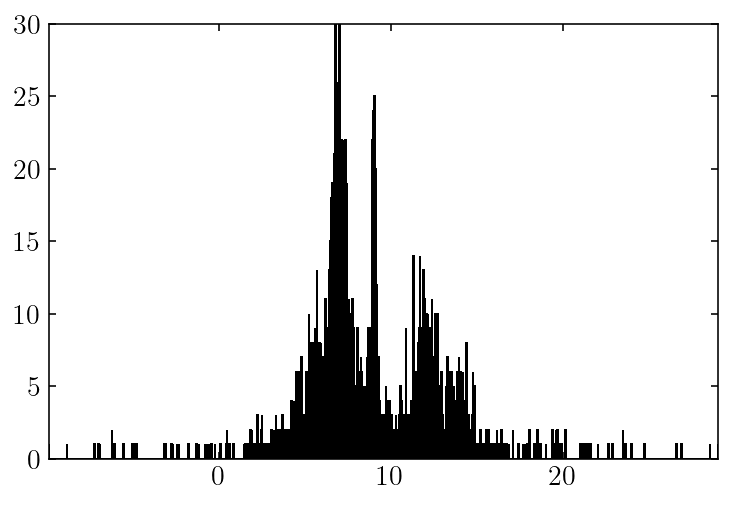

In [27]:
#Let's do the easiest thing ever.
plt.hist(x,bins=1000);

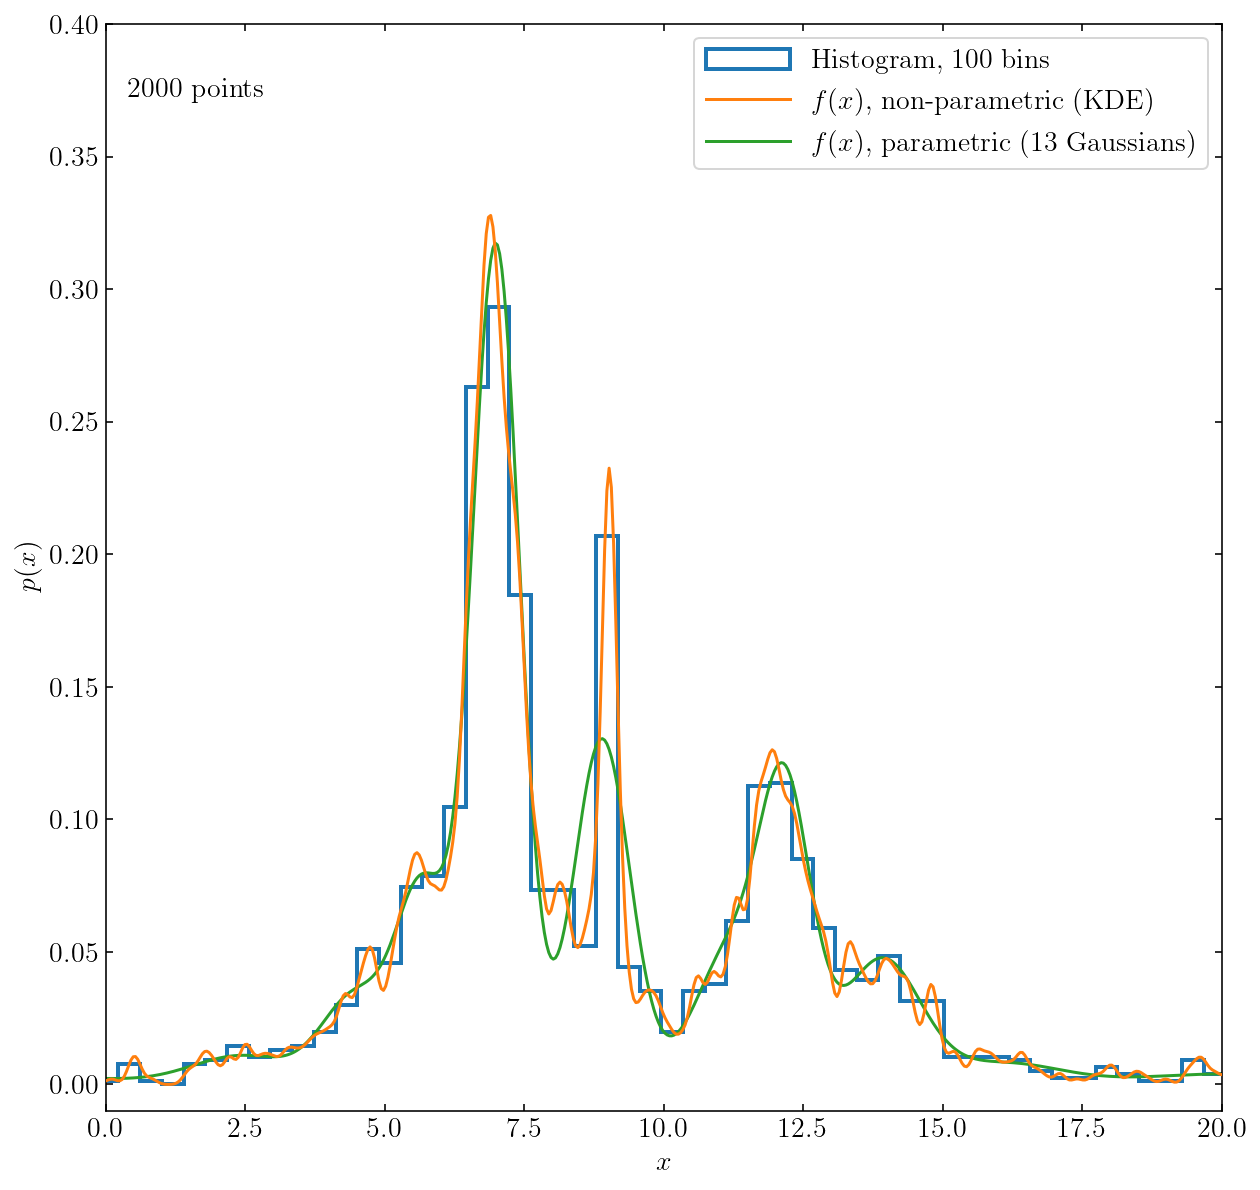

In [28]:
#------------------------------------------------------------
# plot the results
fig,ax = plt.subplots(figsize=(10, 10))
xgrid = np.linspace(-10, 30, 1000)

# True distribution: you typically don't have it! Only have the samples!
if False:
    ax.plot(xgrid, hx(xgrid), ':', color='black', zorder=3,
            label="$h(x)$, Generating Distribution")

# A simple histogram
# But try changing the number of bins!
if True:
    ax.hist(x,density=True,color='C0',bins=100,histtype='step',lw=2, label='Histogram, 100 bins')

# Something more sophisticated: Kernel Density Estimation
# But try changing the bandwith! 
if True:
    kde = KernelDensity(bandwidth=0.1, kernel='gaussian')
    kde.fit(x[:, None])
    dens_kde = np.exp(kde.score_samples(xgrid[:, None]))
    ax.plot(xgrid, dens_kde, '-', color='C1', zorder=3,
            label="$f(x)$, non-parametric (KDE)")

# Use Gaussian Mixtures with a pre-defined number of clusters (13)
if True:
    gmm = GaussianMixture(n_components=13).fit(x.reshape(-1, 1))
    logprob = gmm.score_samples(xgrid.reshape(-1, 1))
    fx = lambda j : np.exp(gmm.score_samples(j.reshape(-1, 1)))
    ax.plot(xgrid, fx(np.array(xgrid)), '-', color='C2',
            label="$f(x)$, parametric (13 Gaussians)")

# Plot cosmetics
ax.text(0.02, 0.95, "%i points" % N, ha='left', va='top',
            transform=ax.transAxes)

ax.set_ylabel('$p(x)$',fontsize=14)
ax.legend(loc='upper right')

ax.set_xlabel('$x$',fontsize=14)
ax.set_xlim(0, 20)
ax.set_ylim(-0.01, 0.4001)

plt.show()

## Nonparametric Modeling & Histograms <a class="anchor" id="three"></a>

Imagine you have some one-dimensional ("univariate") data that you would like to try to understand.  Where by "understand" we mean "know the distribution in the measured space", i.e., you want to know the probability distribution function. Our constant friend is the histogram, and it's usually the first thing any of us do on new data. Simple, right? Not quite...

Let's work through some examples to see what problems we encounter and how we might overcome them.

In [95]:
# Execute this cell to generate a univariate data array, x
# this is the same data used in Ivezic, Figure 6.5

#------------------------------------------------------------
# Generate our data: a mix of several Cauchy distributions
#  this is the same data used in the Bayesian Blocks figure
np.random.seed(0)
N = 1000
mu_gamma_f = [(5, 1.0, 0.1),
              (7, 0.5, 0.5),
              (9, 0.1, 0.1),
              (12, 0.5, 0.2),
              (14, 1.0, 0.1)]
true_pdf = lambda x: sum([f * stats.cauchy(mu, gamma).pdf(x)
                          for (mu, gamma, f) in mu_gamma_f])
x = np.concatenate([stats.cauchy(mu, gamma).rvs(int(f * N))
                    for (mu, gamma, f) in mu_gamma_f])
np.random.shuffle(x)
x = x[x > -10]
x = x[x < 30]

In the next few cells, I plot a normalized histogram of this data with 10 bins, 20 bins, and 100 bins. It starts off looking unimodal and Gaussian-ish, but clearly when more finely binned the data breaks up into several modes.

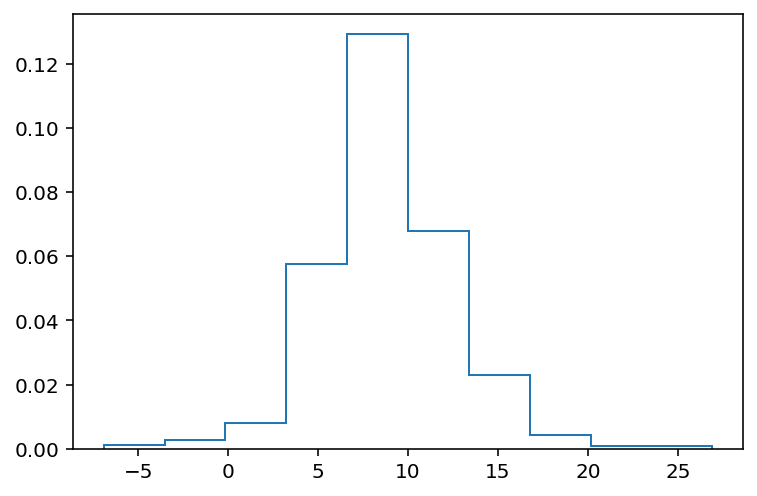

In [96]:
plt.hist(x,bins=10,histtype='step', density=True); 

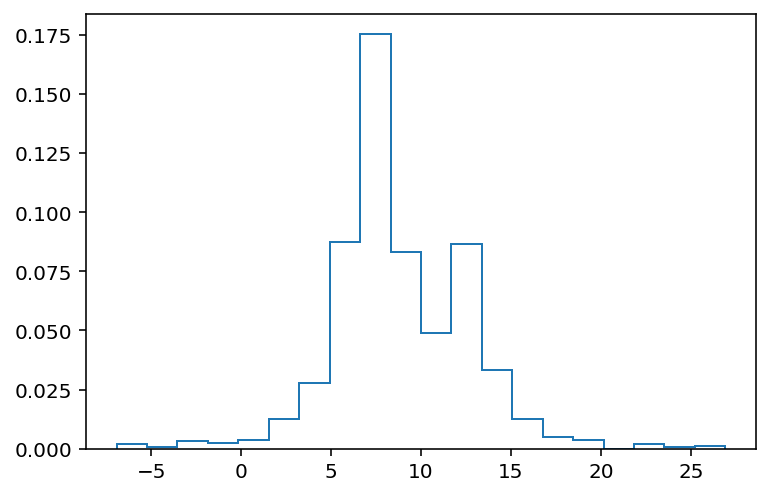

In [97]:
plt.hist(x,bins=20,histtype='step', density=True); 

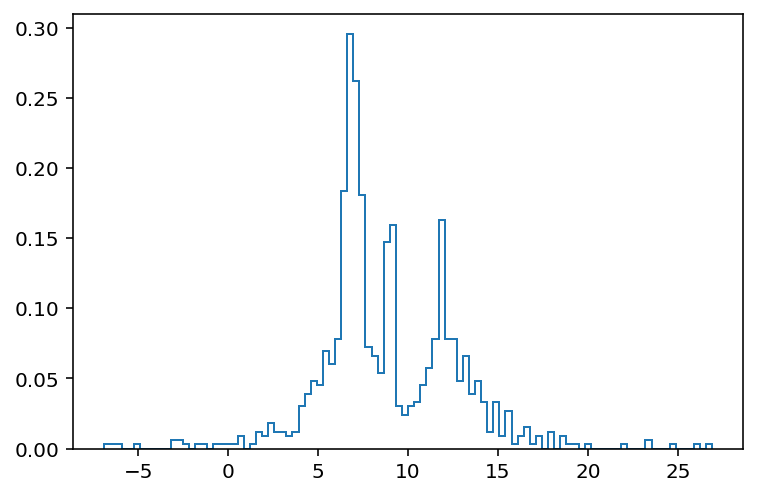

In [98]:
plt.hist(x,bins=100,histtype='step', density=True); 

How would you characterize this distribution?  Could we reasonably think of it as a normal (Gaussian) distribution that we could characterize by some mean and standard deviation?  Maybe, but even just by looking at this plot we see that it wouldn't be a particularly good description of the data.

We find that small changes in the (hyper)parameters of the histogram function *significantly* change the PDF.  That's bad, because the underlying data clearly have **not** changed. One of the problems with histograms is that some bins end up with little (or no) data.  We can fix this by making **variable-width bin sizes** that have the ***same number of objects in each bin***.  How can we do this?

In [99]:
#Execute this cell
a = np.linspace(1,42,num=42)
print(a)
print(a[::2])
print(a[::3])

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42.]
[ 1.  3.  5.  7.  9. 11. 13. 15. 17. 19. 21. 23. 25. 27. 29. 31. 33. 35.
 37. 39. 41.]
[ 1.  4.  7. 10. 13. 16. 19. 22. 25. 28. 31. 34. 37. 40.]


If you are familiar with slicing, then you know that `[::2]` and `[::3]` say to take every other index of the array or every 3rd index of the array.  So, if your array is sorted (like `a` is), then you could use this to instead define the number of values in a bin.  That is for any given value of `M`

    bins = np.append(np.sort(x)[::M], np.max(x))
    
would give bins with `M` objects in each bin.  

*Note:* you need to add the maximum value to set the right edge of the last bin.  


In [100]:
bins100 = np.append(np.sort(x)[::100], np.max(x)) 
bins30 = np.append(np.sort(x)[::30], np.max(x))
print(len(bins100),len(bins30))

11 34


In [101]:
bins100

array([-6.92142972,  5.2432259 ,  6.49176043,  6.87252468,  7.21447313,
        7.9733059 ,  9.01101366, 11.08945533, 12.05155804, 13.82703299,
       26.91818424])

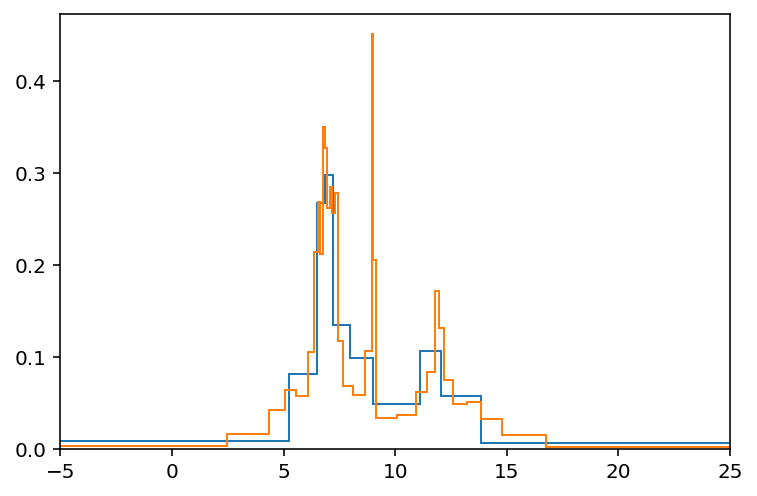

In [102]:
#Note that the underscores and the semicolon at the end both suppress the array output so that we just see the plots
_ = plt.hist(x, bins=bins100, density=True, histtype="step") #Complete
plt.hist(x, bins=bins30, density=True, histtype="step"); #Complete
plt.xlim(-5,25);

Again, this can look pretty different depending on what the number of objects you choose as the minimum for each bin and compared to the plots above.  And it looks a lot different from the plots above.

So, what is the "right" way to set the bin size? There is no "right" way, but there are some useful rules of thumb.

**"Scott's rule"** suggests that the optimal bin width is 

$$\Delta_b = \frac{3.5\sigma}{N^{1/3}}.$$

That's great, but what if we don't know the standard deviation, $\sigma$ (e.g., if the distribution isn't really Gaussian)?  

We can then instead used the **"Freedman-Diaconis rule"**: 

$$\Delta_b = \frac{2(q_{75}-q_{25})}{N^{1/3}} = \frac{2.7\sigma_G}{N^{1/3}}.$$  

Let's try that. Remember that you can compute $\sigma_G$ using `astroML`.

In [103]:
from astroML import stats as astroMLstats
sigmaG2 = astroMLstats.sigmaG(x)
print(sigmaG2)

3.6731977984018402


Now set the bin size accordingly, using [np.arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) and plot.  Make sure that you don't throw away the last object in data set (append that maximum object to the end)! 

In [104]:
binsize = 2.7*sigmaG2/(N**(1/3))
print(binsize)
binsG = np.append(np.arange(start=x.min(), stop=x.max(), step=binsize) , x.max()) #Complete
print(len(binsG))
print(binsG)

0.9917634055684971
36
[-6.92142972e+00 -5.92966631e+00 -4.93790291e+00 -3.94613950e+00
 -2.95437610e+00 -1.96261269e+00 -9.70849286e-01  2.09141194e-02
  1.01267752e+00  2.00444093e+00  2.99620434e+00  3.98796774e+00
  4.97973115e+00  5.97149455e+00  6.96325796e+00  7.95502136e+00
  8.94678477e+00  9.93854818e+00  1.09303116e+01  1.19220750e+01
  1.29138384e+01  1.39056018e+01  1.48973652e+01  1.58891286e+01
  1.68808920e+01  1.78726554e+01  1.88644188e+01  1.98561822e+01
  2.08479456e+01  2.18397090e+01  2.28314724e+01  2.38232359e+01
  2.48149993e+01  2.58067627e+01  2.67985261e+01  2.69181842e+01]


(-5.0, 25.0)

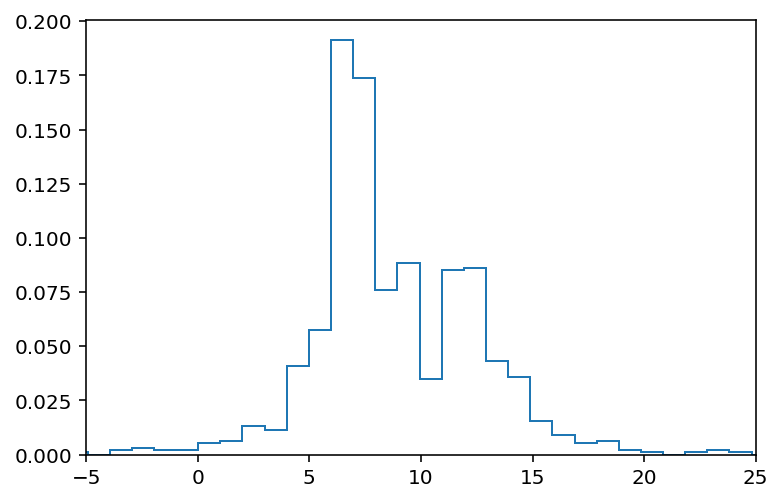

In [105]:
_ = plt.hist(x, bins=binsG, density=True, histtype="step") #Complete
plt.xlim(-5,25)

Did you find that tedious? Me too. Try the following shortcut.

(-5.0, 25.0)

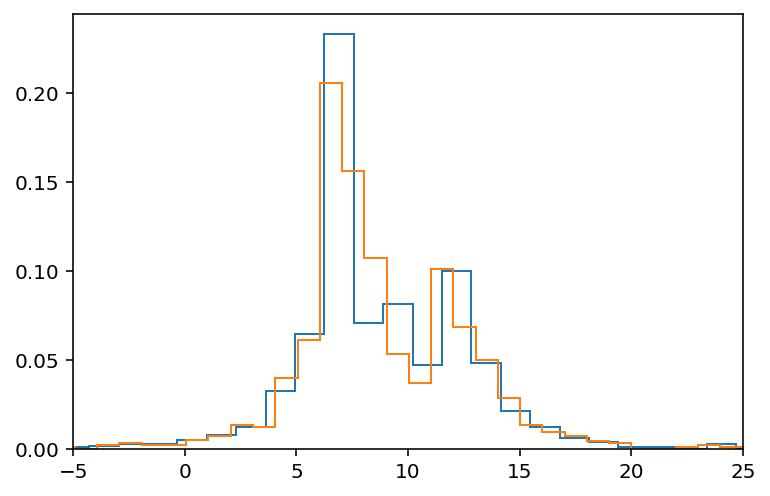

In [106]:
from astropy.visualization.hist import hist as fancyhist
_ = fancyhist(x, bins="scott", histtype="step",density=True)
_ = fancyhist(x, bins="freedman", histtype="step",density=True)
plt.xlim(-5,25)

Note that even those don't yield quite the same results!  But we can do better!

An obvious thing to do is to simply show all of the data.

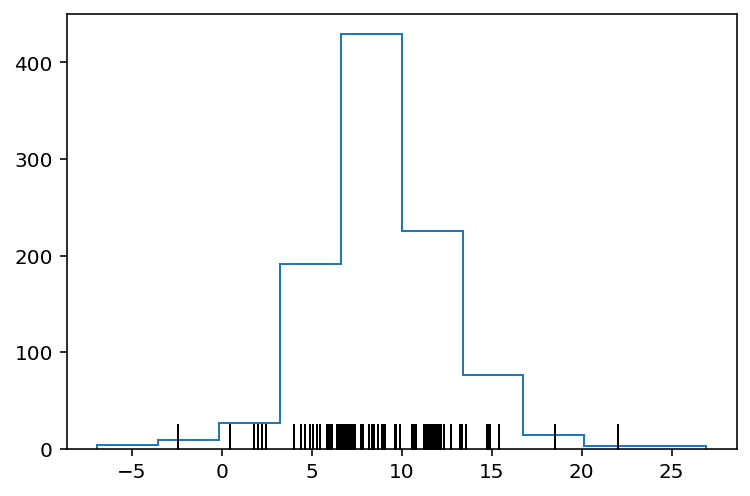

In [107]:
# execute this cell
plt.hist(x,histtype="step")
plt.plot(x[:100], 0*x[:100], '|', color='k', markersize=25) #Note markersize is (annoyingly) in *points*

This is called a **rug plot** and now we have a better idea of where most of the data and where the gaps really are (as opposed to where the binning makes them *appear* to be).  However, the markers are all piled up, so we have lost all sense of the relative numbers of objects.  Are there ~10 at x=5 or could there be 100?


### Kernel Density Estimation (KDE).


This is where **[Kernel Density Estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation) (KDE)** comes in:
- In short the idea here is to represent each data point not as a delta function, but rather as a distribution (e.g., a Gaussian).  
- Those individual distributions ("kernels") are summed up to produce the PDF.  
- One of the advantages of this is that it combines the best of 
    1. the histogram (tells us the relative height of the distribution) 
    2. the rug plot (centers the data points at the actual location of the data instead of within some arbitrary bin)
    

Just about any distribution can be used as the kernel, but the most common are a **Gaussian kernel** and an **Epanechnikov kernel**.  One downside of the Gaussian kernel is that the tails are technically infinite in extent.  So each point has some finite probability of being *everywhere*.  The Epanechnikov kernel has truncated wings.  

One still has the problem of deciding the width of the kernel (e.g., for the Gaussian the "mean" is fixed at the value of the point, but how wide should you make the Gaussian?). For now, we'll just play with the widths by hand to see what might work best.  N.B. the widths of the kernel distribution are referred to as **"bandwidth"**.

In practice, the bandwidth is almost always the key parameter of a KDE representation, the exact shape of the kerne doesn't really matter too much 

In [108]:
# Load the KDE module
from sklearn.neighbors import KernelDensity
xgrid = np.linspace(x.min(),x.max(),1000)  # Use this instead of 'x' for plotting

def kde_sklearn(data, bandwidth = 1.0, kernel="linear"):
    kde_skl = KernelDensity(bandwidth = bandwidth, 
                            kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(xgrid[:, np.newaxis]) # sklearn returns log(density)

    return np.exp(log_pdf)

Before we try the Gaussian and Epanechnikov kernels, let's first start with a tophat using `kernel = "tophat"`, which will produce a plot much like the rug plot.

Start with `bandwidth=0.001`.  See what happens when you adjust this.

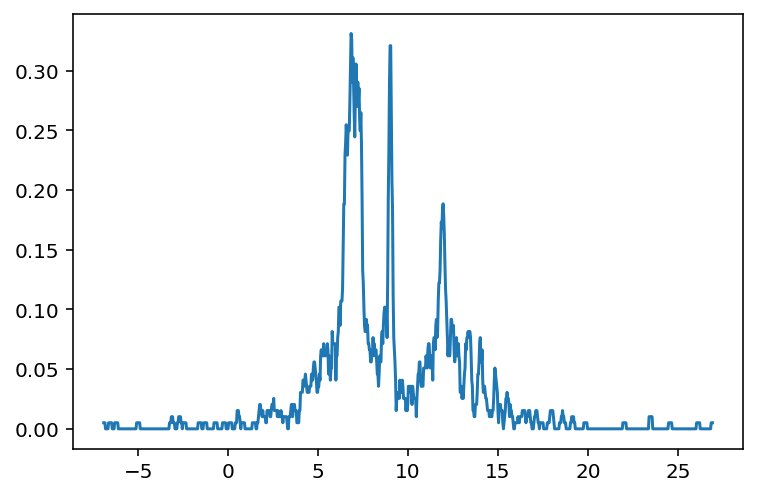

In [113]:
PDFtophat = kde_sklearn(x,bandwidth=0.1,kernel="tophat") #Complete
plt.plot(xgrid,PDFtophat) #Complete

The defaults give a result that is essentially what you would get if you made a histogram with a really large number of bins.

Now let's compare what happens when we adjust the bandwidth (which is just the width of the kernel function).  Try 
`bandwidth=0.1` and `bandwidth=0.5`.

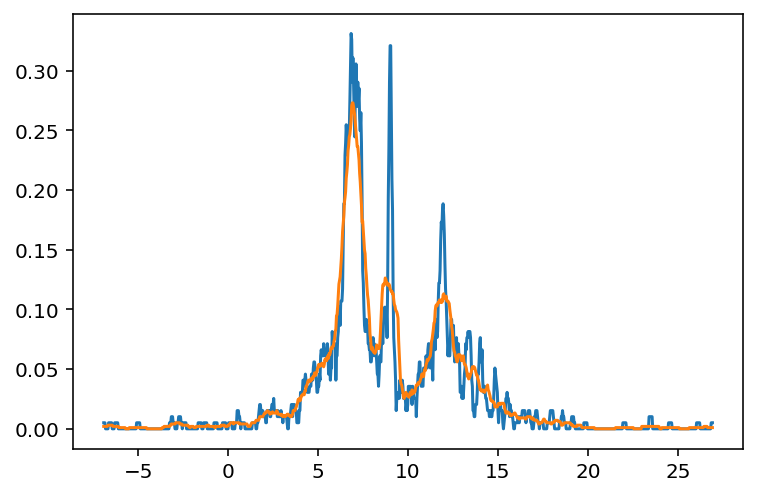

In [114]:
PDFtophat = kde_sklearn(x,bandwidth=0.1,kernel="tophat") #Complete
plt.plot(xgrid,PDFtophat) #Complete

PDFtophat = kde_sklearn(x,bandwidth=0.5,kernel="tophat") #Complete
plt.plot(xgrid,PDFtophat) #Complete

Now let's see what we get with the Gaussian `kernel="gaussian"` and Epanechnikov `kernel="epanechnikov"` kernels. Let's play with the bandwidths until we get something that looks reasonable (and roughly matches) for the two kernels.  They need not be the same.

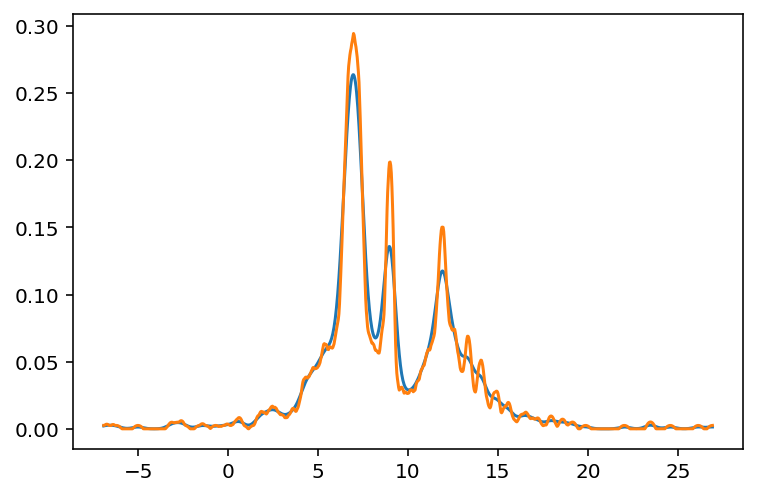

In [115]:
PDFtophat = kde_sklearn(x,bandwidth=0.3,kernel="gaussian") #Complete
plt.plot(xgrid,PDFtophat) #Complete

PDFtophat = kde_sklearn(x,bandwidth=0.3,kernel="epanechnikov") #Complete
plt.plot(xgrid,PDFtophat) #Complete

That's nice (and still pretty different from the histogram that we started out with). We'll see later on how to select the optimal bandwith using cross validation. 

**HISTOGRAMS TAKE-AWAY MESSAGE:** 

Making a histogram is the first-cut we make of data, and it's certainly one of the most sensible things to try to get a feel for the data. But we can't just do it without thinking. We need to explore bin sizes and KDE smoothing bandwidths to tease out the structure in the distributions, and overcome any finite sample effects in bins by potentially having variable bin widths.

Finally, the normalized bin height of a histogram can simply be understood as

$$ f_k = \frac{n_k}{\Delta_b N}$$

where $k$ indexes the bin, $n_k$ is the occupancy number of the bin, $\Delta_b$ is the bin width, and $N$ is the total sample size. If we want to assign **uncertainties** to each bin height (not often done, but its good practice) then we can quote

$$ \sigma_k = \frac{\sqrt{n_k}}{\Delta_b N}$$

(this relies on approximating assuming that binning is a counting experiment, which is Poisson-distributed)

### A note on uncertainties and errors

* Technically, errors are systematic biases that we can not mitigate through collecting lots and lots of data. 
* Statistical uncertainties are the result of random measurement uncertainty. 
* But "error" will be used for both, and denoted as either statistical errors (error bars) or systematic errors (biases).


* Statistical error distributions (error bars) that vary from data point to data point are called **heteroscedastic errors**. If they are the same for all points then they are **homoscedastic errors**.

### Time to get your hands dirty. Black-hole binary formation channels with gaussian mixtures.

Many problems in astrophysics give rise to data with multiple modes. This is typically because different processes physical processes contribute to the observed dataset. 

For instance, one of the most outstanding question in gravitational-wave astrophysics is the formation channel of binary black holes. Leading scenarions include the evolution of isolated binaries in the galactic field and the dynamica assembly of sources in dense environments like globular clusters.


Right now, state-of-the-art analyses seems to say that many channels are all at play. This is a plot by [Zevin et al (2020)](https://arxiv.org/abs/2011.10057)


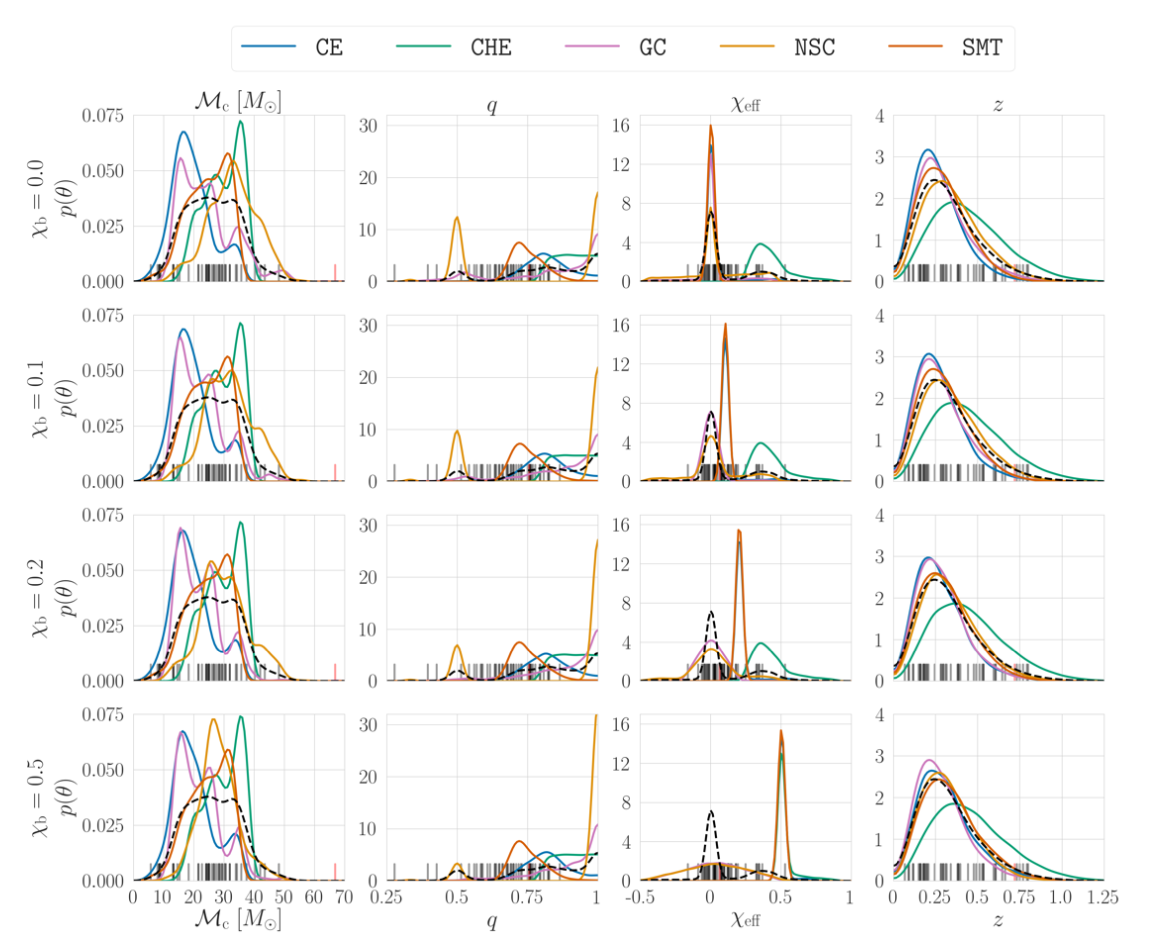

where they consider 5 possibilities for the formation of black hole binaries: common envelop (CE), chemically omogenous stars (CHE), globular clusters (GC), nuclear star clusters (NSC) and stable mass transfer (SMT). 

If you want to know more about LIGO-driven astrophysics and black hole binaries formation channels, these are some recent reviews: [Mandel and Farmer (2021)](https://arxiv.org/abs/1806.05820), [Mapelli (2021)](https://arxiv.org/abs/2106.00699), [Gerosa and Fishbach (2021)](https://arxiv.org/abs/2105.03439).




Anyway. LIGO measures the masses of many black holes. You can find the dataset at `solutions/formationchannels.npy`.


*Hint*: Note that the data provided are of shape (N,1), not (N,). This might be confusing at first, but it's the format that sklearn wants (more on this in a future lecture).  A useful tool to convert between the two is [np.newaxis](https://stackoverflow.com/questions/29241056/how-does-numpy-newaxis-work-and-when-to-use-it).

In [25]:
x=np.linspace(0, 5, 6)
print(x, x.shape)
print(x[np.newaxis,:], x[np.newaxis,:].shape)
print(x[:,np.newaxis], x[:,np.newaxis].shape)


[0. 1. 2. 3. 4. 5.] (6,)
[[0. 1. 2. 3. 4. 5.]] (1, 6)
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]] (6, 1)


Some events form in different astrophysical environments than others. **You want to figure out how many of formation channels are at play.**


The strategy here is to fit a Gaussian Mixture model: that is, my model is a sum of $N$ gaussians each with mean $\mu_j$ and standard deviation $\sigma_j$ and weight $\alpha_j$:

$p(x_i|\theta) = \sum_{j=1}^N \alpha_j \mathcal{N}(\mu_j,\sigma_j) $

This depends on $3N-1$ parameters (not $3N$ because the sum of the $\alpha_j$ must be unity to ensure that this is a probability.

#### Tasks

1) Load this file (`np.load`) and complete a quick exploration of the data. How many modes do you think you see?

2) Take some time to explore `sklearn.mixture.GaussianMixture`. Check the documentation, some examples, the help menu, etc. You first need to define the model (instance of a class), and then train it on the data using the `fit` method (the data provided are already in the right numpy format!). This will output the trained model, which has various attributes.

*Note*. We'll do a more formal introduction to scikit-learn in one of the next lectures. This is meant to be a formative example on how you might find yourself dealing with a library you've never seen before. This happens *all the time* in scientific research!

3) Complete the fit 10 times with $N=1,...,10$ Gaussians. 

Note: `sklearn` by default will use the so-called [Expectation-Maximization algorithm](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm), which is one of the many great things in data science we don't have time to study in detail.

4) For each of this fits, compute the AIC (easy! It's a attribute of the trained model!). Plot $N$ vs AIC: which model is preferred?

5) Plot the preferred solution on top of the input data. You should get a very nice fit!

6) Understand (i.e. plot) which Gaussian mode corresponds to which part of the input dataset. 

*Hint:* Useful methods here are `score_samples` and `predict_proba`: you'll need them both. Try to understand what they do and how you can put them together.




[My solution](https://github.com/dgerosa/astrostatistics_bicocca_2024/blob/main/solutions/S11_formationchannels.ipynb) 

### Class labels or "responsibilities"

Class labels are a very interesting by products of a mixture analysis.

What is the probability that a given gravitational-wave event comes from a given channel? This is called "responsiblity" (i.e. which mode is most likely to be responsible for that piece of data). 

$p(j|x_i) = \frac{a_j \mathcal{N(\mu_j,\sigma_j)}}{\sum_{j=1}^N \alpha_j \mathcal{N}(\mu_j,\sigma_j)}$


#### At home: derive this using Bayes' rule

## Density Estimation <a class="anchor" id="one"></a>

Inferring the pdf of a sample of data is known as ***density estimation***. Essentially we are smoothing the data to correct for the finiteness of our sample and to better recover the underlying distribution.

We have seen some hints in a previous lectures where we discussed histogram bins and KDEs. Let's recap and expand here.


Density estimation is useful because:
- identifying low probability regions can help uncover rare sources. 
- if the data can be divided into sub-samples, one can estimate the pdf for each subsample and, in turn determine classifications for new objects.

### Non-parametric Density Estimation <a class="anchor" id="onea"></a>

*Nonparametric* density estimation is useful when we know nothing about the underlying distribution of the data, since we don't have to specify a functional form. This flexibility allows us to capture the shape of the distribution well, at the expense of more difficulty interpreting the results.

#### Kernel Density Estimation (KDE)

[*Kernel Density Estimation (KDE)*](https://en.wikipedia.org/wiki/Kernel_density_estimation) is the standard approach for non-parametric density estimation.

Let's start by recalling some problems with making simple histograms.

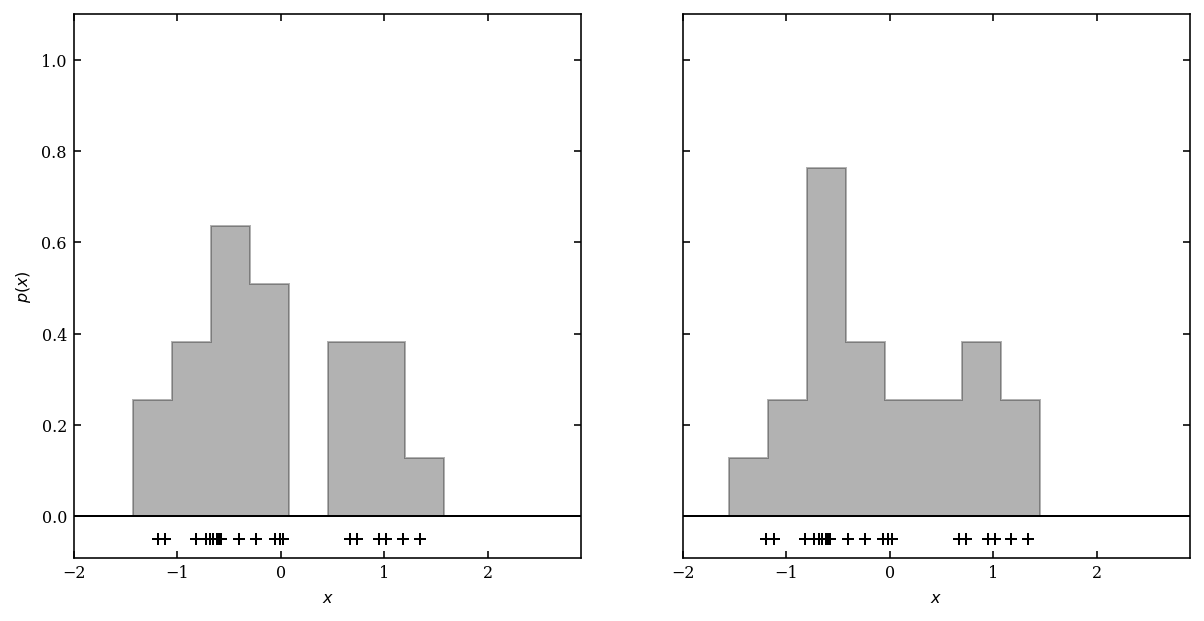

In [16]:
# Execute this cell
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

#------------------------------------------------------------
# Draw some random data
np.random.seed(1)
x = np.concatenate([np.random.normal(-0.5, 0.3, size=14), 
                    np.random.normal(1, 0.3, size=7)])


# Modified from Ivezic, Figure 6.1, modified by GTR
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
#------------------------------------------------------------

# First figure: silly histogram binning
fig1 = plt.figure(figsize=(10, 5))
#fig1.subplots_adjust(left=0.12, right=0.95, wspace=0.05, 
#                    bottom=0.15, top=0.9, hspace=0.05)

FC = '#6666FF'
XLIM = (-2, 2.9)
YLIM = (-0.09, 1.1)

ax = fig1.add_subplot(121)
bins = np.linspace(-1.8, 2.7, 13)
ax.hist(x, bins=bins, density=True, 
        histtype='stepfilled', fc='k', alpha=0.3)
ax.plot(XLIM, [0, 0], '-k', lw=1)
ax.plot(x, 0 * x - 0.05, '+k')
ax.set_xlim(XLIM)
ax.set_ylim(YLIM)
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')

#Shift bin centers by 0.25
ax = fig1.add_subplot(122)
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.hist(x, bins=bins + 0.25, density=True, 
        histtype='stepfilled', fc='k', alpha=0.3)
ax.plot(XLIM, [0, 0], '-k', lw=1)
ax.plot(x, 0 * x - 0.05, '+k')
ax.set_xlim(XLIM)
ax.set_ylim(YLIM)
ax.set_xlabel('$x$')

plt.show()

The data points that make up the histogram are the same in both panels.  All we have done is shifted the locations of the bins by 0.25. ***The choice of number of bins and the location of bin centers can really change the histogram that we make.***

The next panels are what happens if we center the bins on each point. This is an example of **kernel density estimation** using a "***top-hat***" kernel. It is a good description of the data, but pretty ugly.

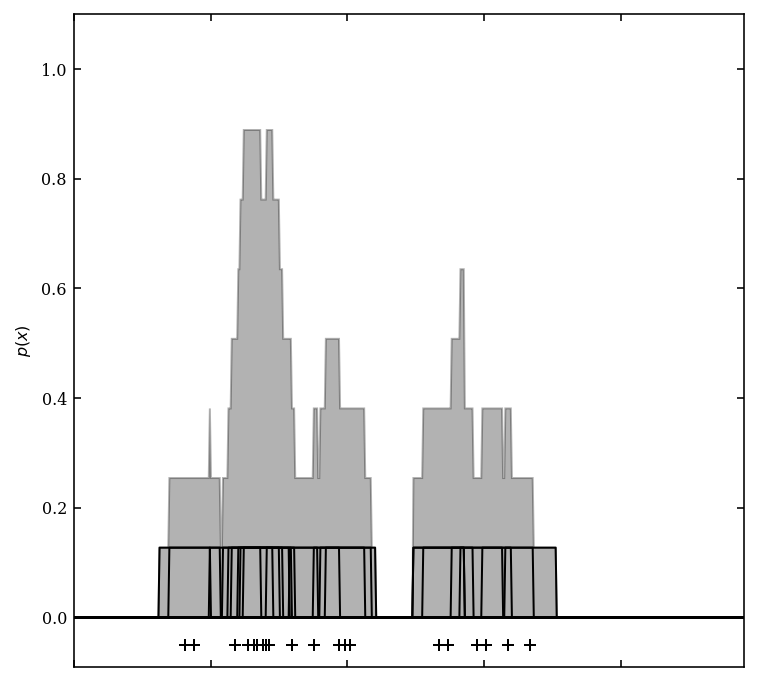

In [17]:
fig1b = plt.figure(figsize=(6, 6))
#fig1b.subplots_adjust(left=0.12, right=0.95, wspace=0.05, 
#                     bottom=0.1, top=0.95, hspace=0.05)

ax = fig1b.add_subplot(111)
ax.xaxis.set_major_formatter(plt.NullFormatter())
binwidth = bins[1] - bins[0]
x_plot = np.linspace(-4, 4, 1000)
y_plot = (abs(x_plot - x[:, None]) <= 0.5 * binwidth).astype(float)
y_plot /= (binwidth * len(x))
ax.fill(x_plot, y_plot.sum(0), ec='k', lw=1, fc='k', alpha=0.3)
ax.plot(x_plot, y_plot.T, '-k', lw=1)
ax.plot(x, 0 * x - 0.05, '+k')
ax.set_xlim(XLIM)
ax.set_ylim(YLIM)
ax.set_ylabel('$p(x)$')

plt.show()

We can make it look nicer by choosing a different kernel, i.e. a different bin shape. The next plot shows a **KDE using a Gaussian kernel**.



Text(0, 0.5, '$p(x)$')

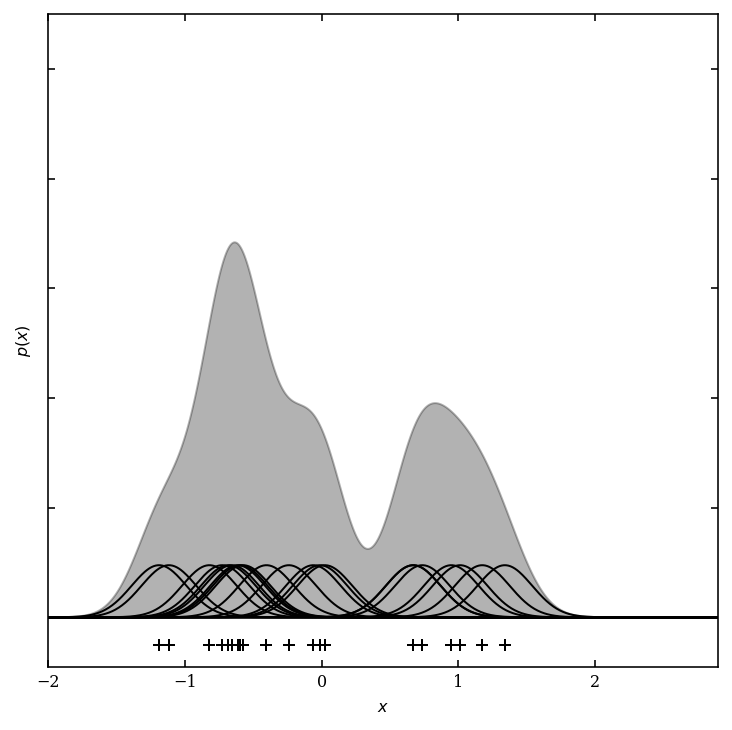

In [18]:
#------------------------------------------------------------
# First figure: transition to KDE
fig2 = plt.figure(figsize=(6, 6))
#fig2.subplots_adjust(left=0.12, right=0.95, wspace=0.05, 
#                     bottom=0.0, top=1.0, hspace=0.05)

## Just right
ax = fig2.add_subplot(111)
ax.yaxis.set_major_formatter(plt.NullFormatter())
binwidth = bins[1] - bins[0]
x_plot = np.linspace(-4, 4, 1000)
y_plot = binwidth * stats.norm.pdf(x_plot, x[:, None], 0.2)
y_plot /= (binwidth * len(x))
ax.fill(x_plot, y_plot.sum(0), ec='k', lw=1, fc='k', alpha=0.3)
ax.plot(x_plot, y_plot.T, '-k', lw=1)
ax.plot(x, 0 * x - 0.05, '+k')
ax.set_xlim(XLIM)
ax.set_ylim(YLIM)
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')

We can think of KDE as replacing the points with "clouds". Each cloud is described by the kernel $K(u)$, where $K(u)$ can be any function that is:
- smooth,
- postive definite,
- normalizes to unity, 
- has zero mean,
- has positive variance. 

A common kernel is the **Gaussian kernel** that we just used above:

$$ K(u) = \frac{1}{(2\pi)^{D/2}}\exp{(-u^2/2)}$$

where $D$ denotes the dimensionality of the data. Once a kernel is chosen the KDE at a point, $x$, is given by 

$$ \hat{f}(x) = \frac{1}{Nh^D}\sum_{i=1}^N K\left(\frac{d(x,x_i)}{h}\right),$$

where $\hat{f}$ is an ***estimator*** of our distribution.

The argument of $K$ is just some measure of the distance between $x$ and each $x_i$. Normally $d(x,x_i) = (x-x_i)$. For the gaussian kernel that makes $h=\sigma$. So, $h$ represents the "width" or what is usually called the **"bandwidth"** in this context.

**The Epanechnikov kernel is "optimal" because it minimizes the variance of the kernel density estimate**: 

$$K(x) = \frac{3}{4}(1-x^2),$$

for $|x|\le 1$ and 0 otherwise. Below is the code that produces the plot above.  


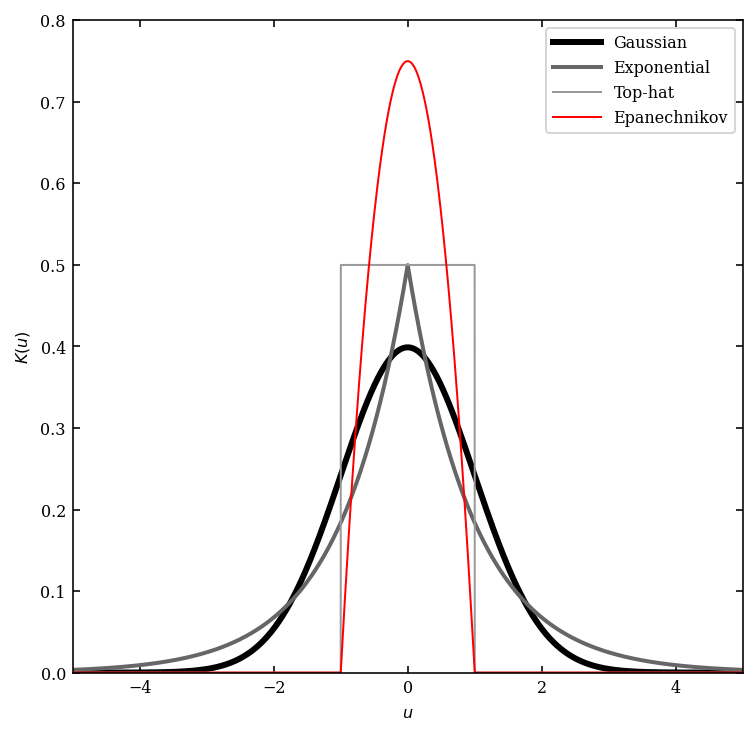

In [19]:
#------------------------------------------------------------
# Compute Kernels.
xgrid = np.linspace(-5, 5, 10000)
dx = xgrid[1] - xgrid[0]

# Gaussian kernel
gauss = (1. / np.sqrt(2 * np.pi)) * np.exp(-0.5 * xgrid ** 2)

# Exponential kernel
exp = 0.5 * np.exp(-abs(xgrid))

# Top-hat kernel
tophat = 0.5 * np.ones_like(xgrid)
tophat[abs(xgrid) > 1] = 0 # Range of the tophat kernel

# Epanechnikov kernel 
ep = 3/4 * (1-xgrid**2)  # Add the Epanechnikov kernel function
ep[np.abs(xgrid)>1] = 0 # Set the range of the kernel

#------------------------------------------------------------
# Plot the kernels
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.plot(xgrid, gauss, '-', c='black', 
        lw=3, label='Gaussian')
ax.plot(xgrid, exp, '-', c='#666666', 
        lw=2, label='Exponential')
ax.plot(xgrid, tophat, '-', c='#999999', 
        lw=1, label='Top-hat')
# Add the Epanechnikov kernel to the plot
ax.plot(xgrid, ep, '-', c='red', 
        lw=1, label='Epanechnikov')  

ax.legend(loc=1)

ax.set_xlabel('$u$')
ax.set_ylabel('$K(u)$')

ax.set_xlim(-5, 5)
ax.set_ylim(0, 0.8001)
plt.show()

#### How do we determine the optimal kernel bandwidth?

You know the answer to this one already: cross validation. Go back to lecture 14.



[0.01       0.04413793 0.07827586 0.11241379 0.14655172 0.18068966
 0.21482759 0.24896552 0.28310345 0.31724138 0.35137931 0.38551724
 0.41965517 0.4537931  0.48793103 0.52206897 0.5562069  0.59034483
 0.62448276 0.65862069 0.69275862 0.72689655 0.76103448 0.79517241
 0.82931034 0.86344828 0.89758621 0.93172414 0.96586207 1.        ]
0.14655172413793105


(-0.09, 1.1)

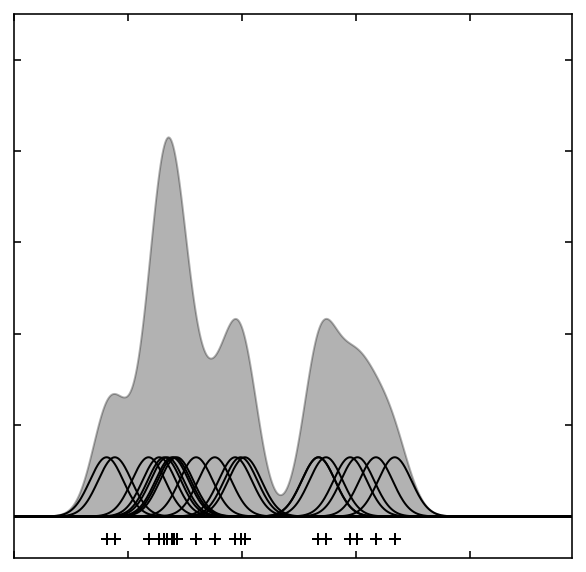

In [20]:
# Complete and Execute this cell to determine the bandwidth
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

bwrange = np.linspace(0.01,1.0, 30) # Test 30 bandwidths from 0.1 to 1.0
print(bwrange)
K = 10 # Do 5-fold cross validation
grid = GridSearchCV(KernelDensity(), {'bandwidth': bwrange}, cv= K) # Try each bandwidth with K-folds
grid.fit(x[:, None]) #Fit the data that we started the lecture with.
h_opt = grid.best_params_['bandwidth']
print(h_opt)

# Execute this cell to see the new "histogram"
fig2 = plt.figure(figsize=(5, 5))
ax = fig2.add_subplot(111)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())

binwidth = bins[1] - bins[0]
x_grid = np.linspace(-4, 4, 1000)
y_plot = binwidth * stats.norm.pdf(x_grid, x[:, None], h_opt)
y_plot /= (binwidth * len(x))

ax.fill(x_grid, y_plot.sum(0), ec='k', lw=1, fc='k', alpha=0.3)
ax.plot(x_grid, y_plot.T, '-k', lw=1)
ax.plot(x, 0 * x - 0.05, '+k')

ax.set_xlim(XLIM)
ax.set_ylim(YLIM)

#### 2-D distributions

Here is some sample code using [`sklearn.neighbors.KernelDensity`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html). Play around with this and see how it works.  Make different variations of the plot.  (For example, try `bandwidth=0.01` and `bandwidth=1.0`.)  What we are doing here is using KDE to set the plot color to indicate the relative density of the points.  This is essentially a 2-D histogram.

/var/folders/zv/8t9z941x3q1gmp080mdw8k_h0000gn/T/ipykernel_77364/1345506922.py:11: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  Xgrid = np.vstack(map(np.ravel, np.meshgrid(u, v))).T


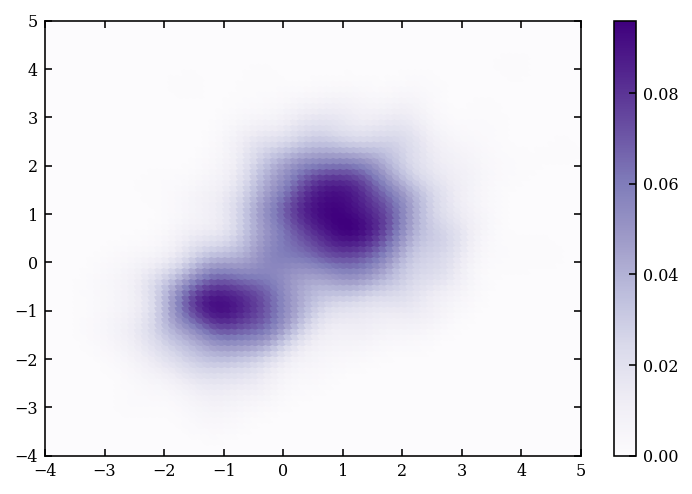

In [21]:
from sklearn.neighbors import KernelDensity

# Two 2-D normal distributions with offset centroids
# See what happens when you make changes to the next 2 lines.
X = np.concatenate([np.random.normal([-1,-1],[0.75,0.75], size=(500,2)), 
                    np.random.normal([1,1],[1,1], size=(1000,2))]) 
kde = KernelDensity(kernel='gaussian', bandwidth=0.3)
kde.fit(X) #fit the model to the data

u = v = np.linspace(-4,5,80)
Xgrid = np.vstack(map(np.ravel, np.meshgrid(u, v))).T
dens = np.exp(kde.score_samples(Xgrid)) #evaluate the model on the grid

plt.scatter(Xgrid[:,0], Xgrid[:,1], c=dens, 
            cmap="Purples", edgecolor="None")
plt.colorbar()

We now want do a data-driven selection of the bandwidth. That's a cross validation on a 2d KDE, which sounds sounds complicated. Actually, look at how easy this is! Just copy the example from above to a new cell and splice in the cross validation code to produce a new plot with the "optimal" bandwidth. Basically, splice in the lines of code for `GridSearchCV` between the lines setting `X` and instantiating `kde`.  Then replace the hardcoded bandwidth with the optimal value you computed.

That's it really, and it just works. This is a good example on how modern python libraries can really make you data-science life so much easier!

[0.01       0.04413793 0.07827586 0.11241379 0.14655172 0.18068966
 0.21482759 0.24896552 0.28310345 0.31724138 0.35137931 0.38551724
 0.41965517 0.4537931  0.48793103 0.52206897 0.5562069  0.59034483
 0.62448276 0.65862069 0.69275862 0.72689655 0.76103448 0.79517241
 0.82931034 0.86344828 0.89758621 0.93172414 0.96586207 1.        ]
0.14655172413793105


/var/folders/zv/8t9z941x3q1gmp080mdw8k_h0000gn/T/ipykernel_77364/1527284737.py:20: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  Xgrid = np.vstack(map(np.ravel, np.meshgrid(u, v))).T


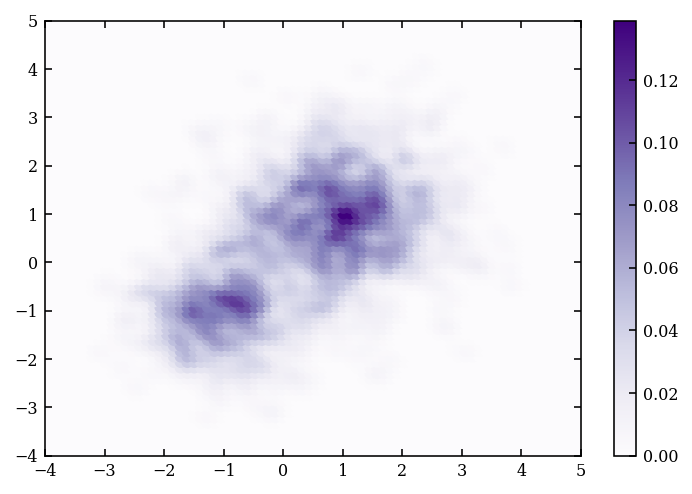

In [22]:
X = np.concatenate([np.random.normal([-1,-1],[0.75,0.75], size=(500,2)), 
                    np.random.normal([1,1],[1,1], size=(1000,2))]) 


#### I pasted from here...
bwrange = np.linspace(0.01,1.0, 30)
print(bwrange)
K = 10 
grid = GridSearchCV(KernelDensity(), {'bandwidth': bwrange}, cv= K)
grid.fit(x[:, None])
h_opt = grid.best_params_['bandwidth']
print(h_opt)
### ... to here


kde = KernelDensity(kernel='gaussian', bandwidth=h_opt) # Changed here.
kde.fit(X) 

u = v = np.linspace(-4,5,80)
Xgrid = np.vstack(map(np.ravel, np.meshgrid(u, v))).T
dens = np.exp(kde.score_samples(Xgrid))

plt.scatter(Xgrid[:,0], Xgrid[:,1], c=dens, 
            cmap="Purples", edgecolor="None")
plt.colorbar()



---

#### Nearest-Neighbor Density Estimation

Another very simple way to estimate the density of an $N$-dimensional distribution is to look to the nearest object (or the $K$ nearest objects) and compute their distances, $d_K$.  This is the [$K$-Nearest Neighbor](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) algorithm. The density at a given point, $x$ is estimated as

$$\hat{f}_K(x) = \frac{K}{V_D(d_K)},$$

where $V_D(d)$ is given generically by $\frac{2d^D\pi^{D/2}}{D\Gamma(D/2)}$ where $\Gamma$ is the complete gamma function, and this formula reduces to the usual equations for area and volume in 2 and 3 dimensions, respectively.

We can simplify this to 

$$\hat{f}_K(x) = \frac{C}{d_K^D}$$

since the constant, $C$ can be evaluated at the end.

This estimator has some intrinsic bias, which can be reduced by considering *all* $K$ nearest neighbors:
$$\hat{f}_K(x) = \frac{C}{\sum_{i=1}^K d_i^D}$$

See the [Scikit-Learn `neighbors` documentation](http://scikit-learn.org/stable/modules/neighbors.html) for more information.

Ivezic, Figure 6.5 compares a Nearest Neighbor ($k=10$) with a KDE algorithm. Let's what happens as you increase the number of neighbors used.

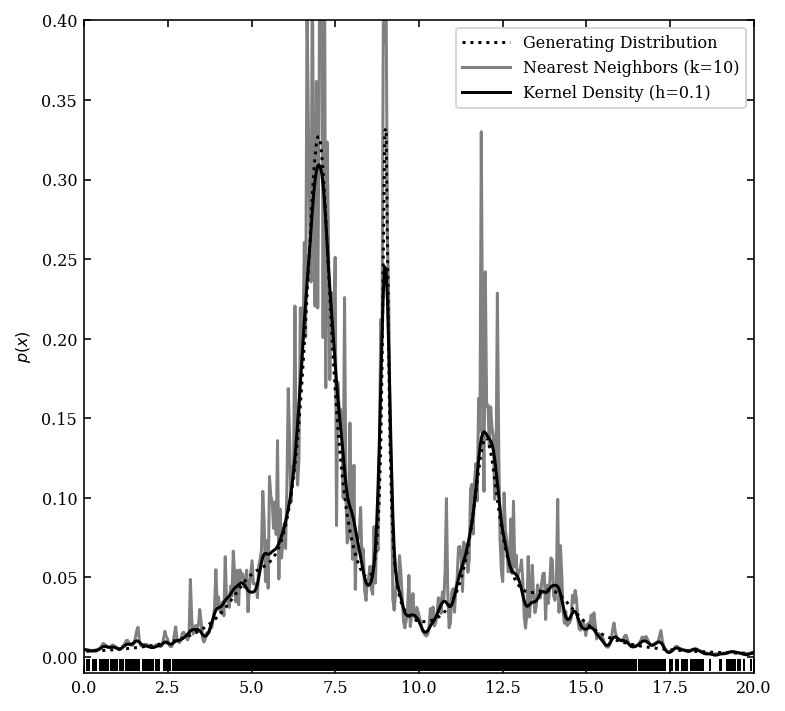

In [23]:
# Based on Ivezic, Figure 6.5
# Modified by GTR
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general

from astroML.density_estimation import KNeighborsDensity
from astropy.visualization import hist
from sklearn.neighbors import KernelDensity

#------------------------------------------------------------
# Generate our data: a mix of several Cauchy distributions
#  this is the same data used in the Bayesian Blocks figure
np.random.seed(0)
N = 10000
mu_gamma_f = [(5, 1.0, 0.1),
              (7, 0.5, 0.5),
              (9, 0.1, 0.1),
              (12, 0.5, 0.2),
              (14, 1.0, 0.1)]
true_pdf = lambda x: sum([f * stats.cauchy(mu, gamma).pdf(x) 
                          for (mu, gamma, f) in mu_gamma_f])
x = np.concatenate([stats.cauchy(mu, gamma).rvs(int(f * N)) 
                    for (mu, gamma, f) in mu_gamma_f])
np.random.shuffle(x)
x = x[x > -10]
x = x[x < 30]

#------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(6, 6))
N = 5000
k = 10 #Number of neighbors

xN = x[:N]
t = np.linspace(-10, 30, 1000)

# Compute density with KDE
kde = KernelDensity(bandwidth=0.1, kernel='gaussian')
kde.fit(xN[:, None])
dens_kde = np.exp(kde.score_samples(t[:, None]))

# Compute density with Bayesian nearest neighbors
nbrs = KNeighborsDensity('bayesian', n_neighbors=k)
nbrs.fit(xN[:, None])
dens_nbrs = nbrs.eval(t[:, None]) / N

# plot the results
plt.plot(t, true_pdf(t), ':', color='black', 
         zorder=3, label="Generating Distribution")
plt.plot(xN, -0.005 * np.ones(len(xN)), '|k')
plt.plot(t, dens_nbrs, '-', lw=1.5, color='gray', 
         zorder=2, label="Nearest Neighbors (k=%i)" % k)
plt.plot(t, dens_kde, '-', color='black', 
         zorder=3, label="Kernel Density (h=0.1)")

# label the plot
plt.ylabel('$p(x)$')
plt.legend(loc='upper right')
plt.xlim(0, 20)
plt.ylim(-0.01, 0.4001)

plt.show()

### Parametric Density Estimation <a class="anchor" id="oneb"></a>

#### Gaussian Mixture Models (GMM)

We've done an excercise on this already, so let me recap this quickly for completeness. KDE centers each bin (or rather, kernel) at each point.  In a [**mixture model**](https://en.wikipedia.org/wiki/Mixture_model) we don't use a kernel for each data point, but rather we fit for the ***locations of the kernels*** in addition to the width. So a mixture model is sort of a hybrid between a traditional (fixed bin location/size) histogram and KDE. 

- Using lots of kernels (maybe even more than the AIC or BIC score suggests) may make sense if you just want to provide an accurate description of the data (as in density estimation).  
- Using fewer kernels makes mixture models more like clustering (see earlier lecture), where the suggestion is still to use many kernels in order to divide the sample into real clusters and "background".

Gaussians are the most commonly used components for mixture models.  So, the pdf is modeled by a sum of Gaussians:

$$p(x) = \sum_{k=1}^N \alpha_k \mathscr{N}(x|\mu_k,\Sigma_k),$$

where $\alpha_k$ are the "mixing coefficients" with $0\le \alpha_k \le 1$ and $\sum_{k=1}^N \alpha_k = 1$.

We can solve for the parameters using maximum likelihood analyis as we have discussed previously.
However, this can be complicated in multiple dimensions, requiring the use of [**Expectation Maximization (EM)**](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm) methods (see textbook for details).

Ivezic Figure 4.2 (next cell) provides an example in 1-D.

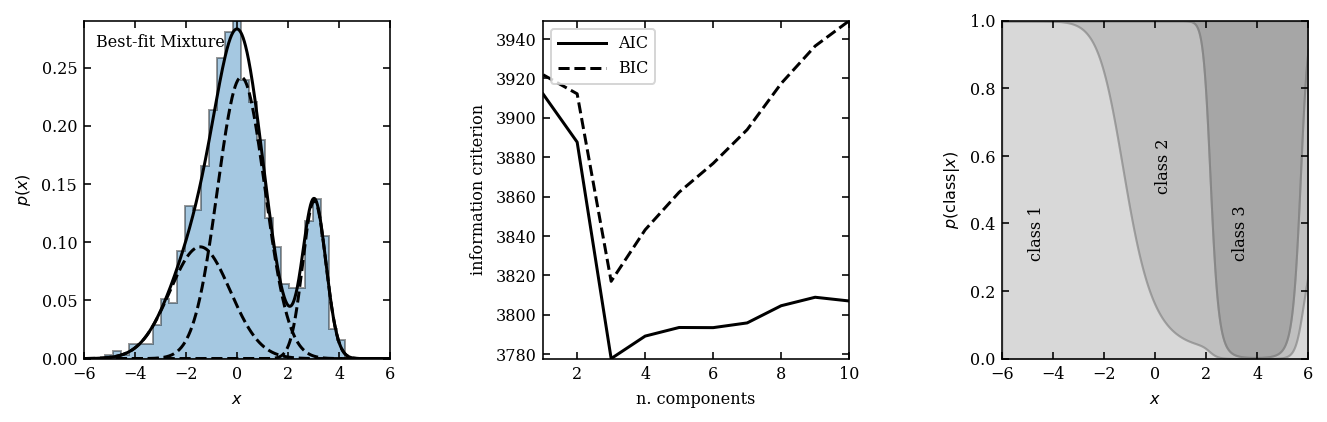

In [24]:
# Ivezic v2, Figure 4.2
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from matplotlib import pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Set up the dataset.
#  We'll create our dataset by drawing samples from Gaussians.

random_state = np.random.RandomState(seed=1)

X = np.concatenate([random_state.normal(-1, 1.5, 350),
                    random_state.normal(0, 1, 500),
                    random_state.normal(3, 0.5, 150)]).reshape(-1, 1)

#------------------------------------------------------------
# Learn the best-fit GaussianMixture models
#  Here we'll use scikit-learn's GaussianMixture model. The fit() method
#  uses an Expectation-Maximization approach to find the best
#  mixture of Gaussians for the data

# fit models with 1-10 components
N = np.arange(1, 11)
models = [None for i in range(len(N))]

for i in range(len(N)):
    models[i] = GaussianMixture(N[i]).fit(X)

# compute the AIC and the BIC
AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

#------------------------------------------------------------
# Plot the results
#  We'll use three panels:
#   1) data + best-fit mixture
#   2) AIC and BIC vs number of components
#   3) probability that a point came from each component

fig = plt.figure(figsize=(10, 3.4))
fig.subplots_adjust(left=0.12, right=0.97,
                    bottom=0.21, top=0.9, wspace=0.5)


# plot 1: data + best-fit mixture
ax = fig.add_subplot(131)
M_best = models[np.argmin(AIC)]

x = np.linspace(-6, 6, 1000)
logprob = M_best.score_samples(x.reshape(-1, 1))
responsibilities = M_best.predict_proba(x.reshape(-1, 1))
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]

ax.hist(X, 30, density=True, histtype='stepfilled', alpha=0.4)
ax.plot(x, pdf, '-k')
ax.plot(x, pdf_individual, '--k')
ax.text(0.04, 0.96, "Best-fit Mixture",
        ha='left', va='top', transform=ax.transAxes)
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')


# plot 2: AIC and BIC
ax = fig.add_subplot(132)
ax.plot(N, AIC, '-k', label='AIC')
ax.plot(N, BIC, '--k', label='BIC')
ax.set_xlabel('n. components')
ax.set_ylabel('information criterion')
ax.legend(loc=2)


# plot 3: posterior probabilities for each component
ax = fig.add_subplot(133)

p = responsibilities
p = p[:, (1, 0, 2)]  # rearrange order so the plot looks better
p = p.cumsum(1).T

ax.fill_between(x, 0, p[0], color='gray', alpha=0.3)
ax.fill_between(x, p[0], p[1], color='gray', alpha=0.5)
ax.fill_between(x, p[1], 1, color='gray', alpha=0.7)
ax.set_xlim(-6, 6)
ax.set_ylim(0, 1)
ax.set_xlabel('$x$')
ax.set_ylabel(r'$p({\rm class}|x)$')

ax.text(-5, 0.3, 'class 1', rotation='vertical')
ax.text(0, 0.5, 'class 2', rotation='vertical')
ax.text(3, 0.3, 'class 3', rotation='vertical')

plt.show()